# Exploring the FEC 2016 Elections Data

* An assignment for the course Machine Learning in practise of Athens University of Economics & Business.
---
> Adam Panagiotidis <br />
> AM: 8170096 <br />
> adampanag06@gmail.com

# Obtaining the Data

* Most of the data that we will use will be downloaded automatically by python commands and is availiable here https://www.fec.gov/data/browse-data/?tab=bulk-data.

* But there are 3 files that you need to download now (because they are bigger than the others) in order to run re-run the notebook.

* Here is the list of the 3 files:
    * https://www.fec.gov/files/bulk-downloads/2016/indiv16.zip
    * https://www.fec.gov/files/bulk-downloads/2016/oppexp16.zip
    * https://www.fec.gov/files/bulk-downloads/2016/oth16.zip

* After unzipping thesse 3 files, put them in a folder named `data`, like this:
    * `data/itcont.txt`
    * `data/oppexp.txt`
    * `data/itoth.txt`

* We'll be referring to them in the code and they must be in the realtive path `/data/` from where the notebook file is.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

# Question 1

### We will begin with identifing the 5 Political Action Committees (PACs) that raised and spent the most money for each of the two presidential candidates.

---

* Let's begin with reading the headers of the file that includes all the contributions from committees to candicates.

In [2]:
headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv')
headers = headers_df.columns.tolist()
headers

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'CAND_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

* So we have downloaded the column headers.

* Now let's download some data from the main data set in order to find out how it looks.

In [3]:
fec = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/pas216.zip', sep="|", index_col=False, nrows=10, names=headers)
fec.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00548198,N,M3,G2016,15950887602,24K,CCM,BLAINE FOR CONGRESS,JEFFERSON CITY,MO,...,NaN,2102015,2500,C00458679,H8MO09153,6783511,998835,NaN,NaN,4032020151240895091
1,C00548198,N,M3,G2016,15950887602,24K,CCM,KEVIN MCCARTHY FOR CONGRESS,BAKERSFIELD,CA,...,NaN,2112015,1000,C00420935,H6CA22125,6788487,998835,NaN,NaN,4032020151240895092
2,C00235739,N,M3,P2014,15950887798,24K,CCM,DAN NEWHOUSE FOR CONGRESS,YAKIMA,WA,...,NaN,2052015,2500,C00559393,H4WA04104,B544444,998836,NaN,NaN,4032020151240895118
3,C00235739,N,M3,P2016,15950887799,24K,CCM,CATHY MCMORRIS RODGERS FOR CONGRESS,SPOKANE,WA,...,NaN,2182015,1000,C00390476,H4WA05077,B544838,998836,NaN,NaN,4032020151240895120
4,C00235739,N,M3,G2018,15950887799,24K,CCM,MANCHIN FOR WEST VIRGINIA,WASHINGTON,DC,...,NaN,2052015,1000,C00486563,S0WV00090,B544441,998836,NaN,NaN,4032020151240895121


* Now we will add the type float to the transaction amount, because we want to treat it as a number. The rest columns can be treated as strings.

In [4]:
data_types = { header: np.str for header in headers }
data_types['TRANSACTION_AMT'] = np.float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'CAND_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

* Let's download the full data set and add to it the headers.

In [5]:
fec = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/pas216.zip', 
                  sep="|", 
                  index_col=False, 
                  names=headers,
                  dtype=data_types,
                  encoding='ISO-8859-1')

print(fec.shape)
fec.sample(5)

(516392, 22)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
61442,C00106740,A,M12,P2016,201603189009793318,24K,CCM,AMI BERA FOR CONGRESS,ELK GROVE,CA,...,NaN,11122015,2500.0,C00461061,H0CA03078,D298BBB499D89EDEEE8,1056435,NaN,NaN,4032120161276599407
210938,C90011156,N,Q3,G2016,201610129032248916,24E,IND,"JORDAN, DOMINIQUE",CLEVELAND,OH,...,NaN,08012016,39.0,P00003392,P00003392,VN7CZA20MH0,1104329,NaN,NaN,4101320161340906884
121971,C00573154,A,YE,P2016,201605049015385769,24E,ORG,SWIFTKURRENT,BEVERLY,MA,...,NaN,10012015,515.0,P60007242,P60007242,SE24.985,1070823,NaN,NaN,4050420161291374528
316499,C00451294,N,Q2,P2016,201607089020384865,24K,CCM,TOM REED FOR CONGRESS,ROCHESTER,NY,...,NaN,06222016,2500.0,C00464032,H0NY29054,D77-001G04,1082066,NaN,NaN,4071120161306490946
480906,C90011156,N,YE,G2016,201701319042152163,24A,IND,"SADJI, YAWO",CANAL WINCHESTER,OH,...,NaN,09072016,34.0,P80001571,P80001571,VN7CZA31Q03,1144686,NaN,NaN,4020920171370085230


* Now we will read the file that contains summary financial information for each PAC and party committee.
* But, there is no ready file with its headers on the website (https://www.fec.gov/data/browse-data/?tab=bulk-data).
* So we will get the headers by doing web scraping from this site https://www.fec.gov/campaign-finance-data/pac-and-party-summary-file-description/.

In [6]:
table = pd.read_html('https://www.fec.gov/campaign-finance-data/pac-and-party-summary-file-description/')

df = table[0]
df.head(5)

,0,1,2,3,4,5,6
0,Column name,Field name,Position,Null,Data type,Description,Example data
1,CMTE_ID,Committee identification,1,N,VARCHAR2 (9),NaN,C00100005
2,CMTE_NM,Committee name,2,Y,VARCHAR2 (200),NaN,National Finance Political Action Committee
3,CMTE_TP,Committee type,3,Y,VARCHAR2 (1),NaN,Q
4,CMTE_DSGN,Committee designation,4,Y,VARCHAR2 (1),NaN,U


In [7]:
headers = df[0].iloc[1:].tolist()
headers

['CMTE_ID',
 'CMTE_NM',
 'CMTE_TP',
 'CMTE_DSGN',
 'CMTE_FILING_FREQ',
 'TTL_RECEIPTS',
 'TRANS_FROM_AFF',
 'INDV_CONTRIB',
 'OTHER_POL_CMTE_CONTRIB',
 'CAND_CONTRIB',
 'CAND_LOANS',
 'TTL_LOANS_RECEIVED',
 'TTL_DISB',
 'TRANF_TO_AFF',
 'INDV_REFUNDS',
 'OTHER_POL_CMTE_REFUNDS',
 'CAND_LOAN_REPAY',
 'LOAN_REPAY',
 'COH_BOP',
 'COH_COP',
 'DEBTS_OWED_BY',
 'NONFED_TRANS_RECEIVED',
 'CONTRIB_TO_OTHER_CMTE',
 'IND_EXP',
 'PTY_COORD_EXP',
 'NONFED_SHARE_EXP',
 'CVG_END_DT']

* Now we will add the type float to the TTL_RECEIPTS, TTL_DISB and IND_EXP because we want to treat them as a number. The rest columns can be treated as strings.
* After that, we will read the file with financial information for each PAC and party committee from https://www.fec.gov/files/bulk-downloads/2016/webk16.zip and we will filter, it in order to contain only PACs and Super-PACs, with the letters 'Q','O','N','V','W'.

In [8]:
data_types = { header: np.str for header in headers }
data_types['TTL_RECEIPTS'] = np.float
data_types['TTL_DISB'] = np.float
data_types['IND_EXP'] = np.float

pacs_summary = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/webk16.zip', sep="|", index_col=False, names=headers, dtype=data_types,
                  encoding='ISO-8859-1')

pacs = pacs_summary[pacs_summary['CMTE_TP'].isin(['Q','O','N','V','W'])]

print(pacs.shape)
pacs.sample(5)

(9204, 27)


,CMTE_ID,CMTE_NM,CMTE_TP,CMTE_DSGN,CMTE_FILING_FREQ,TTL_RECEIPTS,TRANS_FROM_AFF,INDV_CONTRIB,OTHER_POL_CMTE_CONTRIB,CAND_CONTRIB,...,LOAN_REPAY,COH_BOP,COH_COP,DEBTS_OWED_BY,NONFED_TRANS_RECEIVED,CONTRIB_TO_OTHER_CMTE,IND_EXP,PTY_COORD_EXP,NONFED_SHARE_EXP,CVG_END_DT
2010,C00340554,NATIONAL AIR TRANSPORTATION ASSOCIATION POLITI...,Q,B,M,5179.54,0,5000,0,0,...,0,10641.31,7141.38,0,0,8500,0.0,0,0,12/31/2016
5379,C00574475,AMERICA'S YOUTH PAC,O,U,T,12169.09,0,11080.28,120.02,0,...,0,0,0,0,0,0,0.0,0,0,12/31/2016
3653,C00525337,TRULY FREE ENTERPRISE,N,U,Q,652.74,0,0,0,0,...,233,30,28,773,0,0,0.0,0,0,12/31/2016
3182,C00486878,PEOPLE'S MAJORITY,O,U,Q,6500.00,0,6500,0,0,...,0,11830.76,1005.66,0,0,0,0.0,0,0,12/31/2016
6228,C00593228,JOSH LAROSE SENATORIAL VICTORY SUPER PAC,O,U,A,0.00,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,12/31/2015


* Now, we will merge it with the previous file in order to connect the PAC committees' ids with their name and the amount they have earned.

In [9]:
fec = pd.merge(fec, 
               pacs[['CMTE_ID', 'CMTE_NM', 'IND_EXP', 'TTL_RECEIPTS']], 
               on='CMTE_ID',
               how='inner')

print(fec.shape)
fec.sample(5)

(299011, 25)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OTHER_ID,CAND_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,IND_EXP,TTL_RECEIPTS
291639,C00492587,N,Q3,P2016,201610159032816210,24K,CCM,BRIAN MAST FOR CONGRESS,CORAL GABLES,FL,...,C00579896,H6FL18097,SB23.4184,1108662,NaN,NaN,4102720161345555439,AMERICAN CLARITY AND EXCEPTIONALISM (ACEPAC),0.00,45500.00
15799,C00035451,N,M10,G2016,201510199003118856,24K,CCM,GRAVES FOR CONGRESS,KANSAS CITY,MO,...,C00359034,H0MO06073,13581122,1030146,NaN,NaN,4102020151256252915,AIR LINE PILOTS ASSOCIATION PAC,0.00,3734615.94
243640,C00566174,A,Q1,G2016,201910029163583258,24A,ORG,INFOCISION MANAGEMENT CORP,AKRON,OH,...,P00003392,P00003392,SE.6529,1354442,X,NaN,4100320191673645899,TEA PARTY MAJORITY FUND,1826202.95,3352221.42
136080,C00142711,N,M4,P2016,15970341790,24K,CCM,ZELDIN FOR CONGRESS,SHIRLEY,NY,...,C00552547,H8NY01148,3166272341B01161F1E,1002707,NaN,NaN,4041520151241876960,THE BOEING COMPANY POLITICAL ACTION COMMITTEE,0.00,5128539.35
215581,C00309716,N,Q3,P2016,201510149002861024,24K,CCM,RON JOHNSON FOR SENATE INC,OSHKOSH,WI,...,C00482984,S0WI00197,SB23.5417,1028052,NaN,NaN,4101420151255580598,"THE SOCIETY OF THE PLASTICS INDUSTRY, INC. POL...",0.00,52210.00


* Now we will read the headers and after that the whole file that contains information about each candidate who has either registered with the Federal Election Commission or appeared on a ballot list prepared by a state elections office.

    * headers source: https://www.fec.gov/files/bulk-downloads/data_dictionaries/cn_header_file.csv
    * file source: https://www.fec.gov/files/bulk-downloads/2016/cn16.zip

In [10]:
cn_headers = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/cn_header_file.csv')
cn_headers = cn_headers.columns.tolist()
cn_headers

['CAND_ID',
 'CAND_NAME',
 'CAND_PTY_AFFILIATION',
 'CAND_ELECTION_YR',
 'CAND_OFFICE_ST',
 'CAND_OFFICE',
 'CAND_OFFICE_DISTRICT',
 'CAND_ICI',
 'CAND_STATUS',
 'CAND_PCC',
 'CAND_ST1',
 'CAND_ST2',
 'CAND_CITY',
 'CAND_ST',
 'CAND_ZIP']

In [11]:
cn = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/cn16.zip', 
                  sep="|", 
                  index_col=False, 
                  names=cn_headers)
cn.head(5)

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00097,"COX, JOHN R.",REP,2014,AK,H,0.0,C,N,C00525261,P.O. BOX 1092,NaN,ANCHOR POINT,AK,99556.0
1,H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101.0
2,H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054.0
3,H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",DEM,2008,AL,H,5.0,NaN,P,C00239038,PO BOX 2621,NaN,HUNTSVILLE,AL,35804.0
4,H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802.0


* Now we will filter the data set in order to contain only Statutory candidates that have run for presidency during the 2016 elections.

In [12]:
cn = cn[(cn['CAND_ELECTION_YR'] == 2016) & (cn['CAND_OFFICE'] == 'P') & (cn['CAND_STATUS'] == 'C')]
print(cn.shape)
cn.head(5)

(72, 15)


,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4367,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,2016,US,P,0.0,O,C,C00575795,NaN,NaN,NEW YORK,NY,NaN
4377,P00003962,"SCHRINER, JOSEPH CHARLES",UNK,2016,US,P,0.0,O,C,C00385153,542 S MAIN ST,NaN,BLUFFTON,OH,45817.0
4379,P00004275,"BROWN, HARLEY D",NNE,2016,US,P,0.0,O,C,C00569442,6086 HAPPY LANE,NaN,NAMPA,ID,83686.0
4385,P00004861,"BICKELMEYER, MICHAEL",REP,2016,US,P,0.0,O,C,C00553206,399 PEARL ROAD,NaN,BRUNSWICK,OH,44212.0
4478,P20002671,"JOHNSON, GARY / WILLIAM ""BILL"" WELD",LIB,2016,US,P,0.0,O,C,C00605568,NaN,NaN,SALT LAKE CITY,UT,NaN


* Let's merge the previous data set with the candidates.

In [13]:
fec = pd.merge(fec, 
               cn[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')

print(fec.shape)
fec.sample(5)

(19621, 27)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,IND_EXP,TTL_RECEIPTS,CAND_NAME,CAND_PTY_AFFILIATION
543,C00004036,A,M4,P2016,201812179143526001,24E,ORG,SEIU GENERAL FUND,WASHINGTON,DC,...,D363900,1301564,X,NaN,4020720191638275055,SEIU COPE (SERVICE EMPLOYEES INTERNATIONAL UNI...,8550288.58,5.026468e+07,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
18619,C00575373,A,M3,P2016,201606309020104452,24E,ORG,RIGEL STRATEGIES LLC,PLANO,TX,...,SE.5406,1080429,NaN,NaN,4063020161300331878,MAKE AMERICA NUMBER 1,13432442.89,2.073758e+07,"CRUZ, RAFAEL EDWARD ""TED""",REP
13683,C00571372,A,YE,P2016,201605209015994115,24E,ORG,MCCARTHY HENNINGS WHALEN INC.,WASHINGTON,DC,...,SE24.1218,1073914,NaN,NaN,4052020161292981328,RIGHT TO RISE USA,86817478.31,1.216952e+08,"BUSH, JEB",REP
12825,C00620971,A,12G,G2016,201708099070312053,24A,ORG,"GRASSROOTS CAMPAIGNS, INC.",BOSTON,MA,...,VSG8M9T62A2,1178547,NaN,NaN,4081020171446350722,FOR OUR FUTURE,9802204.55,4.894757e+07,"TRUMP, DONALD J. / MICHAEL R. PENCE",REP
19016,C00532572,A,YE,P2016,201605199015536833,24E,ORG,TITAN STRATEGIES,LOUISVILLE,KY,...,SE.6165,1072794,NaN,NaN,4051920161292924624,AMERICA'S LIBERTY PAC,1907308.29,5.197464e+06,"PAUL, RAND",REP


* Let's keep only republicans and democrats.

In [14]:
fec['CAND_PTY_AFFILIATION'].value_counts()

DEM    10083
REP     9465
LIB       67
IND        4
CON        2
Name: CAND_PTY_AFFILIATION, dtype: int64

In [15]:
fec['CAND_PTY_AFFILIATION'].unique()

array(['DEM', 'REP', 'LIB', 'CON', 'IND'], dtype=object)

In [16]:
fec = fec[fec['CAND_PTY_AFFILIATION'].isin(['DEM', 'REP'])]

* We also need to get rid of negative amounts.

In [17]:
(fec['TRANSACTION_AMT'] > 0).value_counts()

True     19247
False      301
Name: TRANSACTION_AMT, dtype: int64

In [18]:
fec = fec[fec['TRANSACTION_AMT'] > 0]

* Let's check the spelling of the candidates' names.

In [19]:
fec['CAND_NAME'].unique()

array(['CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE',
       "O'MALLEY, MARTIN JOSEPH", 'TRUMP, DONALD J. / MICHAEL R. PENCE ',
       'BUSH, JEB', 'WALKER, SCOTT', 'KASICH, JOHN R',
       'GRAHAM, LINDSEY O', 'SANDERS, BERNARD', 'CHRISTIE, CHRISTOPHER J',
       'FIORINA, CARLY', 'CRUZ, RAFAEL EDWARD "TED"', 'JINDAL, BOBBY',
       'PAUL, RAND', 'HUCKABEE, MIKE', 'CARSON, BENJAMIN S SR MD',
       'SANTORUM, RICHARD J.', 'PATAKI, GEORGE E',
       'PERRY, JAMES R (RICK)'], dtype=object)

* We see that Trump's and Clinton's names are very large.
* So, we will trim them.

In [20]:
fec.loc[fec['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD'

fec.loc[fec['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY'

In [21]:
fec['CAND_NAME'].unique()

array(['CLINTON, HILLARY', "O'MALLEY, MARTIN JOSEPH", 'TRUMP, DONALD',
       'BUSH, JEB', 'WALKER, SCOTT', 'KASICH, JOHN R',
       'GRAHAM, LINDSEY O', 'SANDERS, BERNARD', 'CHRISTIE, CHRISTOPHER J',
       'FIORINA, CARLY', 'CRUZ, RAFAEL EDWARD "TED"', 'JINDAL, BOBBY',
       'PAUL, RAND', 'HUCKABEE, MIKE', 'CARSON, BENJAMIN S SR MD',
       'SANTORUM, RICHARD J.', 'PATAKI, GEORGE E',
       'PERRY, JAMES R (RICK)'], dtype=object)

* Now we want to focus our research only for Trump and Clinton.

In [22]:
fec_dthc = fec.loc[fec['CAND_NAME'].isin(['TRUMP, DONALD', 'CLINTON, HILLARY'])].copy()
fec_dthc.sample(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,IND_EXP,TTL_RECEIPTS,CAND_NAME,CAND_PTY_AFFILIATION
10279,C00487470,A,M3,P2016,201605029015369875,24A,ORG,"FATLAB, LLC",NEW YORK,NY,...,SE.6078,1070662,NaN,NaN,4050320161284676676,CLUB FOR GROWTH ACTION,1.918242e+07,1.993680e+07,"TRUMP, DONALD",REP
7337,C00620922,N,30G,G2016,201612029037599287,24E,IND,"KING, JENNIFER",BIRMINGHAM,AL,...,VSGBG9TVQ22,1127942,NaN,NaN,4120220161356486872,JEWS FOR PROGRESS,3.442096e+05,4.750030e+05,"CLINTON, HILLARY",DEM
9744,C00495861,A,M10,G2016,201701319042250800,24A,ORG,FUSE,SAINT LOUIS,MO,...,VNTYH9TKF08,1145646,NaN,NaN,4020920171370184316,PRIORITIES USA ACTION,1.334081e+08,1.920658e+08,"TRUMP, DONALD",REP
13010,C00620583,A,12G,G2016,201707209067008827,24A,ORG,MOSAIC,HYATTSVILLE,MD,...,VTDBC9SF5D0,1174190,X,*,4072520171429962678,WORKING AMERICA COALITION,9.344180e+05,1.673051e+07,"TRUMP, DONALD",REP
7451,C00612820,N,30G,G2016,201612089039969725,24E,ORG,"DIGITAL TURF, LLC",KENNEBUNK,MD,...,24-01-00270-01427,1133021,NaN,NaN,4010320171358296083,IMMIGRANT VOTERS WIN PAC,5.877124e+06,1.062443e+07,"CLINTON, HILLARY",DEM


* Now, we with the groubby command we will find the top 5 PACs that support Trump.
* TTL_RECEIPTS is the amount that each PAC have raised and AMOUNT_SPENT is the amount that they have donated to the candidate.

### Trump's top 5 PACs

In [23]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

fec_tr = fec_dthc[((fec_dthc['CAND_NAME'] == 'TRUMP, DONALD') & (fec_dthc['TRANSACTION_TP'] == '24E'))
                    | ((fec_dthc['CAND_NAME'] == 'CLINTON, HILLARY') & (fec_dthc['TRANSACTION_TP'] == '24A'))]\
    .groupby(['CMTE_NM', 'TTL_RECEIPTS'])['TRANSACTION_AMT'].sum()\
    .sort_values(ascending=False)\
    .reset_index(name='AMOUNT_SPENT')

fec_tr.head(5)

,CMTE_NM,TTL_RECEIPTS,AMOUNT_SPENT
0,FUTURE45,24996520.04,24219101.00
1,GREAT AMERICA PAC,28684572.68,23885544.00
2,REBUILDING AMERICA NOW,23616516.94,21199098.00
3,NATIONAL RIFLE ASSOCIATION OF AMERICA POLITICA...,21591111.40,9315576.00
4,RGA RIGHT DIRECTION PAC,22781720.74,5728857.00


* Let's do the same for Clinton.

### Clinton's top 5 PACs

In [24]:
fec_hc = fec_dthc[((fec_dthc['CAND_NAME'] == 'CLINTON, HILLARY') & (fec_dthc['TRANSACTION_TP'] == '24E'))
                          | ((fec_dthc['CAND_NAME'] == 'TRUMP, DONALD') & (fec_dthc['TRANSACTION_TP'] == '24A'))]\
    .groupby(['CMTE_NM', 'TTL_RECEIPTS'])['TRANSACTION_AMT'].sum()\
    .sort_values(ascending=False)\
    .reset_index(name='AMOUNT_SPENT')

fec_hc.head(5)

,CMTE_NM,TTL_RECEIPTS,AMOUNT_SPENT
0,PRIORITIES USA ACTION,192065767.58,132535920.00
1,OUR PRINCIPLES PAC,19024903.05,16353117.00
2,UNITED WE CAN,24206986.36,13499952.00
3,NEXTGEN CALIFORNIA ACTION COMMITTEE,13232627.44,13240861.00
4,WOMEN VOTE!,36685866.33,11627748.00


# Question 2

### Here we will identify the top 10 individual donors for each of the two presidential candidates and the amount they spent.

* Let's begin with reading the headers (source: https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv) of the file that contains all the individual contributions.

In [25]:
headers_df = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv')
headers = headers_df.columns.tolist()
headers

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

* Now, we will define the data types and then we will read the wholw file (source: https://www.fec.gov/files/bulk-downloads/2016/indiv16.zip). <b>Remember that you have to download this file.</b> 

In [26]:
data_types = { header: np.str for header in headers }
data_types['TRANSACTION_AMT'] = np.float

fec_ind = pd.read_csv('data/itcont.txt', 
                  sep="|", 
                  index_col=False, 
                  names=headers,
                  dtype=data_types)

print(fec_ind.shape)
fec_ind.sample(5)

(20468532, 21)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
15976811,C00577130,A,M3,P2016,201606169018409938,22Y,IND,"JUDD, FLOYD L.",FRESNO,CA,...,NaN,NaN,02072016,500.00,NaN,VPE83A0JDA5,1077916,NaN,NaN,4063020161300350954
19418366,C00586537,A,Q3,P,201708319071271351,15,IND,"SCOTT, PATRICIA",LEAWOOD,KS,...,RETIRED,ATTORNEY,08142016,1000.00,NaN,C9173198,1180866,NaN,NaN,4090120171448382283
5330374,C00401224,A,12P,P2015,201511209003680069,24T,IND,"VILLALTA, ELIZABETH",INTERNATIONAL FALL,MN,...,NOT EMPLOYED,NOT EMPLOYED,05312015,50.00,C00000935,SA11AI_27495630,1034000,NaN,EARMARKED FOR DEMOCRATIC CONGRESSIONAL CAMPAIG...,4112520151258236767
13811591,C00580688,N,Q2,P2016,201607200200269079,15,IND,"MATHEWSON, CHARLES",RENO,NV,...,RETIRED,RETIRED,05312016,5400.00,NaN,SA0725169079449,1090896,NaN,NaN,2080820161309005307
14051679,C00574145,N,Q2,P2016,201607150200219886,15E,IND,"EUREK, LAWRENCE",BELVIDERE,IL,...,CHRYSLER LLC,ELECTRICIAN,04192016,35.00,C00401224,SA0721169886582,1089972,NaN,EARMARKED CONTRIBUTION: SEE BELOW,2080520161308958432


* Removing negative amounts.

In [27]:
(fec_ind['TRANSACTION_AMT'] > 0).value_counts()

True     20084810
False      383722
Name: TRANSACTION_AMT, dtype: int64

In [28]:
fec_ind = fec_ind[fec_ind['TRANSACTION_AMT'] > 0]

* Let's read the headers (https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv) and then the whole file (https://www.fec.gov/files/bulk-downloads/2016/cm16.zip) that contains information for each committee registered with the Federal Election Commission.

In [29]:
cm_headers = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv')
cm_headers = cm_headers.columns.tolist()
cm_headers

cm = pd.read_csv('https://www.fec.gov/files/bulk-downloads/2016/cm16.zip', 
                  sep="|", 
                  index_col=False, 
                  names=cm_headers)

print(cm.shape)
cm.head(5)

(17650, 15)


,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000059,HALLMARK CARDS PAC,ERIN BROWER,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
1,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
2,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
3,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
4,C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN


* Now, will will merge the committees with the individuals in order to know to which committee they have contributed.

In [30]:
fec_ind_cm = pd.merge(fec_ind, 
               cm[['CMTE_ID', 'CMTE_NM', 'CAND_ID']], 
               on='CMTE_ID', 
               how='inner')

print(fec_ind_cm.shape)
fec_ind_cm.head(5)

(20084792, 23)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID
0,C00088591,N,M3,P,15970306895,15,IND,"BURCH, MARY K.",FALLS CHURCH,VA,...,02132015,500.00,NaN,2A8EE0688413416FA735,998834,NaN,NaN,4032020151240885624,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN
1,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,...,02132015,200.00,NaN,20150211113220-479,998834,NaN,NaN,4032020151240885819,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN
2,C00088591,N,M3,P,15970306960,15,IND,"KOUNTZ, DONALD E.",FALLS CHURCH,VA,...,02272015,200.00,NaN,20150225112333-476,998834,NaN,NaN,4032020151240885820,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN
3,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,...,02132015,200.00,NaN,20150309_2943,998834,NaN,NaN,4032020151240885683,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN
4,C00088591,N,M3,P,15970306915,15,IND,"DOSHI, NIMISH M.",FALLS CHURCH,VA,...,02272015,200.00,NaN,20150224153748-2525,998834,NaN,NaN,4032020151240885684,EMPLOYEES OF NORTHROP GRUMMAN CORPORATION PAC,NaN


* Now, will will merge the candidates with the individuals in order to know to which candidate they support.

In [31]:
fec_ind_cm_cn = pd.merge(fec_ind_cm, 
               cn[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')

print(fec_ind_cm_cn.shape)
fec_ind_cm_cn.sample(5)

(4964002, 25)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
3004088,C00575795,A,M6,P2016,201607309022056540,15,IND,"WILLIAMS, ANDRESSA",ROCKY MOUNT,NC,...,NaN,C5118417,1091720,NaN,NaN,4080320161308208686,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
2997298,C00575795,A,M6,P2016,201607309022050935,15,IND,"MEISNER, RON",BROOKLYN,NY,...,NaN,C5158516,1091720,NaN,NaN,4080320161308191869,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
2849856,C00575795,A,M5,P2016,201607309021968314,15,IND,"MARQUARDT, CATHERINE",WASHINGTON,DC,...,NaN,C4181161,1091718,NaN,NaN,4080320161307953746,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
2891729,C00575795,A,M5,P2016,201607309022005062,15,IND,"OLSEN, ANYA",WESTBOROUGH,MA,...,NaN,C4287719,1091718,NaN,NaN,4080320161308063991,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM
3326812,C00580100,A,30G,G2016,201906289150361845,15,IND,"BEECH, KAREN",ACWORTH,GA,...,NaN,SA17A.6511,1335965,NaN,NaN,4071020191659107111,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD J. / MICHAEL R. PENCE",REP


* Let's correct some names and keep only Trump and Clinton.

In [32]:
fec_ind_cm_cn['CAND_NAME'].unique()

array(['EVERSON, MARK', 'SANTORUM, RICHARD J.',
       'CARSON, BENJAMIN S SR MD', 'CRUZ, RAFAEL EDWARD "TED"',
       'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE',
       'BICKELMEYER, MICHAEL', 'HUCKABEE, MIKE', 'KASICH, JOHN R',
       'DOYLE, COLIN B', 'GILMORE, JAMES S III', 'JINDAL, BOBBY',
       'GRAHAM, LINDSEY O', 'CHRISTIE, CHRISTOPHER J', 'BUSH, JEB',
       'CHAFEE, LINCOLN DAVENPORT MR.',
       'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'PAUL, RAND',
       'MANELSKI, DEVON MARCUS', 'WALKER, SCOTT', 'PATAKI, GEORGE E',
       'LESSIG, LAWRENCE', 'DE  LA  FUENTE, ROQUE ROCKY',
       'BASIAGO, ANDREW DANIEL', 'SANDERS, BERNARD',
       'WELLS, ROBERT CARR JR', 'BROWN, HARLEY D', 'BOWERS, KERRY DALE',
       'HILL, CHRISTOPHER V', 'WILSON, WILLIE', 'FIORINA, CARLY',
       'KELSO, LLOYD THOMAS', 'SCHRINER, JOSEPH CHARLES',
       'STEINBERG, MICHAEL ALAN', 'PETERSEN, AUSTIN WADE',
       'SHERMAN, JEFFERSON WOODSON', 'ROY, JOHN CHARLES', 'DREW, ARTHUR',
       'CARTER, W

In [33]:
fec_ind_cm_cn.loc[fec_ind_cm_cn['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD'
fec_ind_cm_cn.loc[fec_ind_cm_cn['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY'

In [34]:
fec_ind_cm_cn['CAND_PTY_AFFILIATION'].unique()

array(['REP', 'DEM', 'IND', 'NNE', 'UNK', 'LIB', 'UN', 'GRE', 'CON',
       'AMP', 'NPA'], dtype=object)

In [35]:
fec_ind_cm_cn = fec_ind_cm_cn[fec_ind_cm_cn['CAND_PTY_AFFILIATION'].isin(['DEM', 'REP'])]

In [36]:
fec_ind_cm_cn = fec_ind_cm_cn.loc[fec_ind_cm_cn['CAND_NAME'].isin(['TRUMP, DONALD', 'CLINTON, HILLARY'])]

* Let's get the top donors.

In [37]:
fec_ind_cm_cn_grouped = fec_ind_cm_cn\
.groupby(['NAME', 'CAND_NAME'])['TRANSACTION_AMT'].sum()\
.sort_values(ascending=False)

fec_ind_cm_cn_grouped.head(10)

NAME                     CAND_NAME       
TRUMP, DONALD J          TRUMP, DONALD      10033637.00
TRUMP, DONALD J.         TRUMP, DONALD       6532038.00
TRUMP, DONALD J J.       TRUMP, DONALD       2067482.00
CLINTON, HILLARY RODHAM  CLINTON, HILLARY    1450306.00
BOCH, ERNIE              TRUMP, DONALD        171172.00
TREIBEL, RANDY           TRUMP, DONALD         52352.00
HAMLIN, TRISH            TRUMP, DONALD         38400.00
RUNYAN, R. BRADLEY       CLINTON, HILLARY      35100.00
HYDE, ROBERT             TRUMP, DONALD         34085.00
SMITH, MICHAEL           CLINTON, HILLARY      33909.00
Name: TRANSACTION_AMT, dtype: float64

* We see that Trump have tree different names, so let's make them one.

In [38]:
fec_ind_cm_cn.loc[fec_ind_cm_cn['NAME'] == 'TRUMP, DONALD J', 'NAME'] = 'TRUMP, DONALD'
fec_ind_cm_cn.loc[fec_ind_cm_cn['NAME'] == 'TRUMP, DONALD J.', 'NAME'] = 'TRUMP, DONALD'
fec_ind_cm_cn.loc[fec_ind_cm_cn['NAME'] == 'TRUMP, DONALD J J.', 'NAME'] = 'TRUMP, DONALD'
fec_ind_cm_cn.loc[fec_ind_cm_cn['NAME'] == 'CLINTON, HILLARY RODHAM', 'NAME'] = 'CLINTON, HILLARY'

* Grouping by again in order to see if the changes happened.

In [39]:
fec_ind_cm_cn_grouped = fec_ind_cm_cn\
.groupby(['NAME', 'CAND_NAME'])['TRANSACTION_AMT'].sum()\
.sort_values(ascending=False)

fec_ind_cm_cn_grouped.head(10)

NAME                CAND_NAME       
TRUMP, DONALD       TRUMP, DONALD      18633157.00
CLINTON, HILLARY    CLINTON, HILLARY    1450306.00
BOCH, ERNIE         TRUMP, DONALD        171172.00
TREIBEL, RANDY      TRUMP, DONALD         52352.00
HAMLIN, TRISH       TRUMP, DONALD         38400.00
RUNYAN, R. BRADLEY  CLINTON, HILLARY      35100.00
HYDE, ROBERT        TRUMP, DONALD         34085.00
SMITH, MICHAEL      CLINTON, HILLARY      33909.00
FRIEDMAN, JANELLE   CLINTON, HILLARY      32400.00
BURNS, URSULA       CLINTON, HILLARY      32400.00
Name: TRANSACTION_AMT, dtype: float64

* Now, let's find the top donors for Trump only.

In [40]:
donors_trump = fec_ind_cm_cn[fec_ind_cm_cn['CAND_NAME'] == 'TRUMP, DONALD']\
.groupby(['NAME'])['TRANSACTION_AMT'].sum()\
.sort_values(ascending=False)

donors_trump.head(10)

NAME
TRUMP, DONALD      18633157.00
BOCH, ERNIE          171172.00
TREIBEL, RANDY        52352.00
HAMLIN, TRISH         38400.00
HYDE, ROBERT          34085.00
WILLIAMS, DAVID       29572.00
SMITH, JAMES          26818.00
GIGANTE, PETER        26300.00
BARRETT, NOEL         24300.00
PALATCHI, ROBERT      24132.00
Name: TRANSACTION_AMT, dtype: float64

* And here are the top donors for Clinton only.

In [41]:
donors_clinton = fec_ind_cm_cn[fec_ind_cm_cn['CAND_NAME'] == 'CLINTON, HILLARY']\
.groupby(['NAME'])['TRANSACTION_AMT'].sum()\
.sort_values(ascending=False)

donors_clinton.head(10)

NAME
CLINTON, HILLARY     1450306.00
RUNYAN, R. BRADLEY     35100.00
SMITH, MICHAEL         33909.00
BURNS, URSULA          32400.00
FRIEDMAN, JANELLE      32400.00
ELLING, MARTIN         32399.00
COHEN, DAVID           27459.00
BROWN, MICHAEL         25903.00
SMITH, DAVID           24613.00
MILLER, DAVID          22728.00
Name: TRANSACTION_AMT, dtype: float64

#### The amounts we found are donated to committes apert from PACs. So, now we will find the individual contributions that were made only to PACs.

---

* We will keep only the contributions that are greater then 100 dollars, in order to avoid handling with minor amounts and save RAM.

In [42]:
fec_ind_100 = fec_ind[fec_ind['TRANSACTION_AMT'] > 100]

print(fec_ind_100.shape)

(4186837, 21)


* Here we will get all the PACs that support Trump by the data set `fec_dthc` from Question 1.
* As you see, we filter with transaction type 24E (in favor) and 24A (opposed).

In [43]:
fec_trump = fec_dthc[((fec_dthc['CAND_NAME'] == 'TRUMP, DONALD') & (fec_dthc['TRANSACTION_TP'] == '24E'))
                    | ((fec_dthc['CAND_NAME'] == 'CLINTON, HILLARY') & (fec_dthc['TRANSACTION_TP'] == '24A'))]

print(fec_trump.shape)
fec_trump.sample(5)

(6396, 27)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,IND_EXP,TTL_RECEIPTS,CAND_NAME,CAND_PTY_AFFILIATION
6510,C00553560,N,Q2,G2016,201605209016005113,24A,ORG,FORTH RIGHT STRATEGY INC,WASHINGTON,DC,...,SE.16893,1074003,X,NaN,4052320161293050391,VIGOP (VIRGIN ISLANDS REPUBLICAN PARTY),737140.10,3493514.62,"CLINTON, HILLARY",DEM
3368,C00566174,A,Q1,G2016,201910029163583213,24A,ORG,INFOCISION MANAGEMENT CORP,AKRON,OH,...,SE.5820,1354442,NaN,NaN,4100320191673645721,TEA PARTY MAJORITY FUND,1826202.95,3352221.42,"CLINTON, HILLARY",DEM
3613,C00524454,N,YE,G2016,201601209004548561,24A,ORG,INFOCISION MANAGEMENT CORP,AKRON,OH,...,SE.15816,1041055,NaN,NaN,4012120161260764597,CONSERVATIVE MAJORITY FUND,761555.29,1311944.47,"CLINTON, HILLARY",DEM
3815,C00524454,A,Q2,G2016,201610099032217879,24A,ORG,INFOCISION MANAGEMENT CORP,AKRON,OH,...,SE.9230,1103380,X,NaN,4101120161340760396,CONSERVATIVE MAJORITY FUND,761555.29,1311944.47,"CLINTON, HILLARY",DEM
10301,C00586826,N,YE,P2016,201601129004470947,24E,ORG,INFOCISION MANAGEMENT CORP,AKRON,OH,...,SE.4209,1039076,NaN,NaN,4011320161260558257,PATRIOTS FOR TRUMP,122475.96,131622.69,"TRUMP, DONALD",REP


* Let's merge with individuals.

In [44]:
fec_ind_fec_tr = pd.merge(fec_ind_100, 
               fec_trump[['CMTE_ID', 'CAND_NAME']], 
               on='CMTE_ID',
               how='inner')

print(fec_ind_fec_tr.shape)
fec_ind_fec_tr.sample(5)

(11535897, 22)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_NAME
5130023,C00544767,A,12R,P,201706059055301527,10,IND,"COKINOS, GEORGE",PLAINFIELD,IN,...,RETIRED,11042016,250.00,NaN,SA17.705959,1164771,NaN,NON CONTRIBUTION ACCOUNT,4060520171409412778,"CLINTON, HILLARY"
8597006,C00569905,A,Q2,P,201611219037215356,10,IND,"KAHUT, JERALD MR",OREGON CITY,OR,...,RETIRED,05012016,2000.00,NaN,SA11A.157904,1126540,NaN,NaN,4120220161356548740,"TRUMP, DONALD"
10238600,C00608489,A,12G,P,201707199066813508,15,IND,"LAWRENCE, KELLY",GLENDORA,CA,...,OWNER,10182016,1000.00,NaN,SA11A.621582,1173436,NaN,NaN,4072020171426331398,"TRUMP, DONALD"
550120,C00553560,N,M12,P,201512139004176306,15,IND,"PHILLIPS 791, HARRY MR",AMARILLO,TX,...,OIL AND GAS INVESTOR,11232015,500.00,NaN,SA11AI.95293,1035569,NaN,NaN,4121420151259692016,"CLINTON, HILLARY"
8449185,C00569905,A,Q1,NaN,201611049037115952,10,IND,"HALL, ROBERT E. MR.",WESTMINSTER,CO,...,RETIRED,01012016,200.00,NaN,SA11A.131164,1123601,NaN,NaN,4120220161356533087,"TRUMP, DONALD"


* Removing duplicates.

In [45]:
fec_ind_fec_tr.duplicated().sum()

11403998

In [46]:
fec_ind_fec_tr = fec_ind_fec_tr.drop_duplicates()

In [47]:
print(fec_ind_fec_tr.shape)

(131899, 22)


* Now. we will groupby and find the top donors for Trump that donated to PACs.

In [48]:
donors_trump2 = fec_ind_fec_tr[fec_ind_fec_tr['ENTITY_TP'].isin(['IND', 'CAN'])]\
.groupby('NAME')['TRANSACTION_AMT'].sum()\
.sort_values(ascending=False)

donors_trump2.head(10)

NAME
ADELSON, MIRIAM            20000000.00
ADELSON, SHELDON           20000000.00
MERCER, ROBERT             15500000.00
MCMAHON, LINDA E.          14000000.00
MARCUS, BERNARD            12000000.00
UIHLEIN, RICHARD           10781600.00
PERLMUTTER, ISAAC          10000000.00
HENDRICKS, DIANE            8152900.00
PALMER, GEOFFREY H.         8000000.00
STEPHENS, JACKSON T. JR.    7190200.00
Name: TRANSACTION_AMT, dtype: float64

* Let's do exactly the same for Clinton.

In [49]:
fec_clinton = fec_dthc[((fec_dthc['CAND_NAME'] == 'CLINTON, HILLARY') & (fec_dthc['TRANSACTION_TP'] == '24E'))
                    | ((fec_dthc['CAND_NAME'] == 'TRUMP, DONALD') & (fec_dthc['TRANSACTION_TP'] == '24A'))]

print(fec_clinton.shape)
fec_clinton.sample(5)

(5919, 27)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,IND_EXP,TTL_RECEIPTS,CAND_NAME,CAND_PTY_AFFILIATION
9989,C00135368,A,30G,G2016,201701319042384630,24A,IND,"JONES, ADELA",OAKLAND,CA,...,SE.35435,1146460,NaN,NaN,4020820171369949664,SIERRA CLUB POLITICAL COMMITTEE,463486.44,1264728.54,"TRUMP, DONALD",REP
60,C00012476,A,M5,P2016,201608279023755409,24E,ORG,K & R INDUSTRIES,CHANTILLY,VA,...,SE.17640,1097228,NaN,NaN,4082920161315986573,UNITED ASSOCIATION POLITICAL EDUCATION COMMITT...,204068.00,9690176.46,"CLINTON, HILLARY",DEM
13088,C00620583,A,30G,G2016,201708189070460884,24A,ORG,MOSAIC,HYATTSVILLE,MD,...,VTDBC9SGRR6,1179951,NaN,NaN,4082120171447698316,WORKING AMERICA COALITION,934417.99,16730513.10,"TRUMP, DONALD",REP
2768,C00566174,N,YE,G2016,201601209004550234,24E,ORG,INFOCISION MANAGEMENT CORP,AKRON,OH,...,SE.38264,1041104,NaN,NaN,4012120161260764691,TEA PARTY MAJORITY FUND,1826202.95,3352221.42,"CLINTON, HILLARY",DEM
12361,C00526673,N,Q3,G2016,201610159032539565,24A,ORG,MISSION CONTROL INC,GLASTONBURY,CT,...,SE.5499,1107612,NaN,NaN,4102520161345202844,FAIR SHARE ACTION,2541485.43,4321798.00,"TRUMP, DONALD",REP


In [50]:
fec_ind_fec_cl = pd.merge(fec_ind_100, 
               fec_clinton[['CMTE_ID', 'CAND_NAME']], 
               on='CMTE_ID',
               how='inner')

print(fec_ind_fec_cl.shape)
fec_ind_fec_cl.sample(5)

(4558988, 22)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CAND_NAME
1585292,C00341396,N,MY,P,201507309000465473,15,IND,"STOKES, SHAUNA M",CHULA VISTA,CA,...,RETIRED,04082015,400.00,NaN,5537296,1019224,NaN,NaN,4073120151248092113,"TRUMP, DONALD"
2707122,C00341396,A,12G,P,201705239055143058,15,IND,"BLASER, TERRY",WATERVILLE,KS,...,RETIRED,10092016,150.00,NaN,6240280,1163965,NaN,NaN,4052420171405748126,"CLINTON, HILLARY"
3714479,C00162818,A,Q3,P,201701069040980777,15,IND,"MCCORMICK, WILLIAM",PHILADELPHIA,PA,...,ENGINEER,08262016,181.00,NaN,AC1563D664A194424BEE,1137134,NaN,NaN,4011120171365779087,"CLINTON, HILLARY"
3851941,C00162818,A,Q2,P,201701069040977522,15,IND,"FEAN, KEVIN",PHILADELPHIA,PA,...,ENGINEER,05252016,231.00,NaN,A5C76A02EFF6049F3AED,1137133,NaN,NaN,4011120171365769539,"CLINTON, HILLARY"
3902914,C00162818,N,Q1,NaN,201604129012295407,15,IND,"FELMEY, GREGG",PHILADELPHIA,PA,...,ENGINEER,02252016,181.00,NaN,A9121853D05C642D5893,1059817,NaN,NaN,4041320161283095047,"CLINTON, HILLARY"


In [51]:
fec_ind_fec_cl.duplicated().sum()

4379768

In [52]:
fec_ind_fec_cl = fec_ind_fec_cl.drop_duplicates()

In [53]:
print(fec_ind_fec_cl.shape)

(179220, 22)


* We observed that some names where entered differently, so we will correct them.

In [54]:
fec_ind_fec_cl.loc[fec_ind_fec_cl['NAME'] == 'SIMONS, JAMES H.', 'NAME'] = 'SIMONS, JAMES'
fec_ind_fec_cl.loc[fec_ind_fec_cl['NAME'] == 'SUSSMAN, S. DONALD', 'NAME'] = 'SUSSMAN, DONALD'

In [55]:
donors_clinton2 = fec_ind_fec_cl[fec_ind_fec_cl['ENTITY_TP'].isin(['IND', 'CAN'])]\
.groupby('NAME')['TRANSACTION_AMT'].sum()\
.sort_values(ascending=False)

donors_clinton2.head(10)

NAME
STEYER, THOMAS F.       179000000.00
SUSSMAN, DONALD          64100000.00
EYCHANER, FRED           58350000.00
SIMONS, JAMES            41500000.00
SOROS, GEORGE            36006386.00
MOSKOVITZ, DUSTIN        32931000.00
BLOOMBERG, MICHAEL R.    21665089.00
PRITZKER, JAY ROBERT     18951696.00
ABRAHAM, DANIEL          18500000.00
MERCER, ROBERT           15500000.00
Name: TRANSACTION_AMT, dtype: float64

* Now, we will connect the two data sets of Trump's donors and the two data sets of Clintons donors.

### Trump's top 10 individual donors.

In [56]:
trump_top10_ind_donors = donors_trump.append(donors_trump2)

trump_top10_ind_donors.sort_values(ascending=False).reset_index(name='AMOUNT_DONATED').head(10)

,NAME,AMOUNT_DONATED
0,"ADELSON, SHELDON",20000000.00
1,"ADELSON, MIRIAM",20000000.00
2,"TRUMP, DONALD",18633157.00
3,"MERCER, ROBERT",15500000.00
4,"MCMAHON, LINDA E.",14000000.00
5,"MARCUS, BERNARD",12000000.00
6,"UIHLEIN, RICHARD",10781600.00
7,"PERLMUTTER, ISAAC",10000000.00
8,"HENDRICKS, DIANE",8152900.00
9,"PALMER, GEOFFREY H.",8000000.00


### Clinton's top 10 individual donors.

In [57]:
clinton_top10_ind_donors = donors_clinton.append(donors_clinton2)

clinton_top10_ind_donors.sort_values(ascending=False).reset_index(name='AMOUNT_DONATED').head(10)

,NAME,AMOUNT_DONATED
0,"STEYER, THOMAS F.",179000000.00
1,"SUSSMAN, DONALD",64100000.00
2,"EYCHANER, FRED",58350000.00
3,"SIMONS, JAMES",41500000.00
4,"SOROS, GEORGE",36006386.00
5,"MOSKOVITZ, DUSTIN",32931000.00
6,"BLOOMBERG, MICHAEL R.",21665089.00
7,"PRITZKER, JAY ROBERT",18951696.00
8,"ABRAHAM, DANIEL",18500000.00
9,"MERCER, ROBERT",15500000.00


# Question 3

### Let's find out the expenditures made by the Trump's & Clinton's campaign for each month.

---

* We will begin with reading the headers and adding types to them.

* After that we will read the whole file and we will add to it the headers with data types.

In [58]:
headers_opexp = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv')
headers_opexp = headers_opexp.columns.tolist()
headers_opexp

['CMTE_ID',
 'AMNDT_IND',
 'RPT_YR',
 'RPT_TP',
 'IMAGE_NUM',
 'LINE_NUM',
 'FORM_TP_CD',
 'SCHED_TP_CD',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'TRANSACTION_PGI',
 'PURPOSE',
 'CATEGORY',
 'CATEGORY_DESC',
 'MEMO_CD',
 'MEMO_TEXT',
 'ENTITY_TP',
 'SUB_ID',
 'FILE_NUM',
 'TRAN_ID',
 'BACK_REF_TRAN_ID']

In [59]:
data_types_opexp = { header: np.str for header in headers_opexp }
data_types_opexp['TRANSACTION_AMT'] = np.float
data_types_opexp

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_YR': str,
 'RPT_TP': str,
 'IMAGE_NUM': str,
 'LINE_NUM': str,
 'FORM_TP_CD': str,
 'SCHED_TP_CD': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'TRANSACTION_PGI': str,
 'PURPOSE': str,
 'CATEGORY': str,
 'CATEGORY_DESC': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'ENTITY_TP': str,
 'SUB_ID': str,
 'FILE_NUM': str,
 'TRAN_ID': str,
 'BACK_REF_TRAN_ID': str}

In [60]:
opexp = pd.read_csv('data/oppexp.txt', 
                  sep="|", 
                  index_col=False, 
                  names=headers_opexp,
                  dtype=data_types_opexp,
                  parse_dates=['TRANSACTION_DT'],
                  encoding='ISO-8859-1')

print(opexp.shape)
opexp.sample(5)

(1747283, 25)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,PURPOSE,CATEGORY,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID
1034469,C00574624,A,2016,M2,201608209022689149,23,F3P,SB,UBER,SAN FRANCISCO,...,TRAVEL,NaN,NaN,X,NaN,ORG,4082320161313284545,1096260,SBCCUV23.4981,SB239.90135
710506,C00608216,N,2016,Q1,201604200200153642,17,F3,SB,LAS BRISAS,ENGLEWOOD,...,MEALS,NaN,NaN,NaN,NaN,NaN,2051620161292828141,1067187,SB0513163642132,NaN
1538776,C00000935,A,2016,30G,201708079070246784,21B,F3X,SB,NYC TAXI,NEW YORK,...,TRAVEL,002,Travel Expenses,X,MEMO ENTRY,ORG,4081120171446551339,1178120,SB21B-953872-40000,SB21B-953872
1189717,C00031088,N,2016,M5,201605209016003645,21B,F3X,SB,EVENTBRITE,SAN FRANCISCO,...,EVENTBRITE PROCESSING FEES,NaN,NaN,NaN,NaN,ORG,4052320161293080981,1073988,B27F7DD53CCCA4D90BBB,NaN
650361,C00608265,N,2016,Q2,201607159020537425,17,F3,SB,EFUNDRAISING CONNECTIONS,SACRAMENTO,...,CREDIT CARD FEES,001,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4071520161306711501,1085611,SB17.E1635950,NaN


* Removing negative amaounts.

In [61]:
(opexp['TRANSACTION_AMT'] > 0).value_counts()

True     1729618
False      17665
Name: TRANSACTION_AMT, dtype: int64

In [62]:
opexp = opexp[opexp['TRANSACTION_AMT'] > 0]

#### Due to "out of bounds nanosecond timestamp" error that we faced, we will do the following: 

* Transform TRANSACTION_DATE column to datetime and coerce the errors. 
* Filter the dataset in order to get rid of unnecessary dates.

In [63]:
opexp['TRANSACTION_DT'] = pd.to_datetime(opexp['TRANSACTION_DT'], errors='coerce')

In [64]:
opexp['TRANSACTION_DT'].sample(5)

225694    2015-05-19
1095113   2016-01-05
1600689   2015-11-25
1596203   2015-04-11
244354    2015-08-07
Name: TRANSACTION_DT, dtype: datetime64[ns]

In [65]:
opexp = opexp[(opexp['TRANSACTION_DT'] < '2016-12-12')]

* Now, we will add a new column that will display the year and month that each transaction happend.

In [66]:
print(opexp['TRANSACTION_DT'].dt.to_period('M').sample(5))

1149281   2016-02
1395592   2016-10
1530080   2016-01
695087    2016-06
465598    2016-07
Name: TRANSACTION_DT, dtype: object


In [67]:
opexp['TRANSACTION_MONTH'] = opexp['TRANSACTION_DT'].dt.to_period('M')

* Now, we will merge the operating expenditures data set with the "fec_trump" that we have from before. The result will be a data set with the operating expenditures that PACs that support Trump have made.

In [68]:
opexp_trump_pacs = pd.merge(opexp, 
               fec_trump[['CMTE_ID', 'CAND_NAME']], 
               on='CMTE_ID',
               how='inner')

print(opexp_trump_pacs.shape)
opexp_trump_pacs.sample(5)

(3844459, 27)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,CATEGORY_DESC,MEMO_CD,MEMO_TEXT,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID,TRANSACTION_MONTH,CAND_NAME
233026,C00553560,N,2015,M6,15971240159,21B,F3X,SB,FIRST VIRGINIA COMMUNITY BANK,FAIRFAX,...,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4062220151245914665,1011437,SB21B.66384,NaN,2015-05,"CLINTON, HILLARY"
991398,C00553560,N,2016,Q2,201605209016005083,21B,F3X,SB,MACKENZIE & COMPANY,ARLINGTON,...,Administrative/Salary/Overhead Expenses,NaN,NaN,ORG,4052320161293086388,1074003,SB21B.25460,NaN,2016-04,"CLINTON, HILLARY"
3294280,C00530766,N,2015,YE,201601299004711314,21B,F3X,SB,"ALL SEASONS STRATEGIES, LLC",SPOKANE,...,NaN,NaN,NaN,ORG,4021020161262769761,1044172,SB21B.4297,NaN,2015-11,"CLINTON, HILLARY"
1671999,C00553560,N,2015,M10,201510209003211930,21B,F3X,SB,DIRECT SUPPORT SERVICES,WASHINGTON,...,Solicitation and Fundraising Expenses,NaN,NaN,ORG,4102220151256471500,1030722,SB21B.84958,NaN,2015-09,"CLINTON, HILLARY"
166779,C00553560,N,2016,M9,201609209032033068,21B,F3X,SB,DIRECT SUPPORT SERVICES INC,WASHINGTON,...,Solicitation and Fundraising Expenses,NaN,NaN,ORG,4092220161323059931,1100902,SB21B.56163,NaN,2016-08,"CLINTON, HILLARY"


* Checking if there are duplicates and then droping them.

In [69]:
opexp_trump_pacs.duplicated().sum()

3808805

In [70]:
opexp_trump_pacs = opexp_trump_pacs.drop_duplicates()

#### Here we calculate the operating expenditures of Trump's PACs by month.

* The way we do this is by grouping the data set 'opexp_trump_pacs' by month.

In [71]:
tr_spend_pacs = opexp_trump_pacs.groupby('TRANSACTION_MONTH')['TRANSACTION_AMT'].sum().sort_index().reset_index(name='AMOUNT_SPENT')

tr_spend_pacs

,TRANSACTION_MONTH,AMOUNT_SPENT
0,2015-01,2232699.37
1,2015-02,2323494.30
2,2015-03,3001247.39
3,2015-04,3441642.34
4,2015-05,3593659.67
5,2015-06,5217271.96
6,2015-07,3523296.66
7,2015-08,3119377.84
8,2015-09,7452456.88
9,2015-10,4076866.99


* Here we find the operating expenditures by each committee and change Trump's & Clinton's display name.

In [72]:
opexp_cmties = pd.merge(opexp, 
               cm[['CMTE_ID', 'CMTE_NM', 'CAND_ID']], 
               on='CMTE_ID', 
               how='inner')


opexp_cmties = pd.merge(opexp_cmties, 
               cn[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')


opexp_cmties.loc[opexp_cmties['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD'

opexp_cmties.loc[opexp_cmties['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY'


print(opexp_cmties.shape)
opexp_cmties.sample(5)

(287211, 30)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID,TRANSACTION_MONTH,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
270696,C00577130,A,2016,M4,201606149017898176,23,F3P,SB,JANICA MANNER,FLOODWOOD,...,ORG,4041820171398904912,1077404,VPE83A10967,NaN,2016-03,BERNIE 2016,P60007168,"SANDERS, BERNARD",DEM
96137,C00575449,A,2015,Q3,201603319012207322,23,F3P,SB,RIGHTON STRATEGIES LLC,MANCHESTER,...,ORG,4040120161281943884,1057795,B0ADAE08A58064193A8A,NaN,2015-07,"RAND PAUL FOR PRESIDENT, INC.",P40003576,"PAUL, RAND",REP
51480,C00579458,A,2015,YE,201605169015508793,23,F3P,SB,AVENTURA WORLDWIDE TRANSPORTATION,AVENTURA,...,ORG,4051720161292850238,1072235,SB23.I19463,SB23.I10507,2015-10,"JEB 2016, INC.",P60008059,"BUSH, JEB",REP
166557,C00575795,A,2016,M10,201701099041196570,23,F3P,SB,"FISHER, MICHAEL ELLIOTT",NEW YORK,...,IND,4011120171365025168,1137625,D288382,NaN,2016-09,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY",DEM
156008,C00575795,A,2016,30G,201702149049687478,23,F3P,SB,"SCHNEIDER, LAUREN CLASS",NEW YORK,...,IND,4021720171371035004,1148953,D360187,NaN,2016-11,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY",DEM


* Let's get the operating expenditures by each committe that supports Trump and check if there are any duplicates.

In [73]:
opexp_trump_cmties = opexp_cmties[opexp_cmties['CAND_NAME'] == 'TRUMP, DONALD']

print(opexp_trump_cmties.shape)
opexp_trump_cmties.sample(5)

(29989, 30)


,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,ENTITY_TP,SUB_ID,FILE_NUM,TRAN_ID,BACK_REF_TRAN_ID,TRANSACTION_MONTH,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
90910,C00580100,A,2016,30G,201906289150409106,23,F3P,SB,"HUTCHISON, JOHN",SAN MARINO,...,IND,4071020191659118168,1335965,SB23.265267,NaN,2016-11,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
83533,C00580100,A,2016,12G,201904059146023963,23,F3P,SB,AVIS RENT A CAR,PARSIPPANY,...,ORG,4041020191646099150,1322657,SB23.6052,NaN,2016-09,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
95216,C00580100,A,2016,M8,201811199133793683,23,F3P,SB,"FITZPATRICK, FLETCHER",NEW YORK,...,IND,4112020181618283319,1291697,SB23.1615453,NaN,2016-07,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
89375,C00580100,A,2016,30G,201906289150409517,23,F3P,SB,STRANAHAN THEATER,TOLEDO,...,ORG,4071020191659120634,1335965,SB23.266193,NaN,2016-10,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
70542,C00580100,N,2016,M3,201603209011931949,23,F3P,SB,SPECIAL EVNTSNEW ENGLAND,AUBURN,...,ORG,4032220161276767072,1056932,SB23.363403,NaN,2015-12,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP


In [74]:
opexp_trump_cmties.duplicated().sum()

0

* We see that there are no duplicates.

* So we move on.

#### Now we will calculate the amount spend each month by committees that support Trump.

* We will do that by grouping the data set 'opexp_trump_cmties' by each month.

In [75]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

tr_spend_cmties = opexp_trump_cmties.groupby('TRANSACTION_MONTH')['TRANSACTION_AMT'].sum().sort_index().reset_index(name='AMOUNT_SPENT')

tr_spend_cmties

,TRANSACTION_MONTH,AMOUNT_SPENT
0,2015-04,197738.32
1,2015-05,358715.09
2,2015-06,870798.78
3,2015-07,763324.82
4,2015-08,1850246.51
5,2015-09,1845830.99
6,2015-10,1691236.99
7,2015-11,2620480.95
8,2015-12,3076835.53
9,2016-01,12105750.13


#### Final step

* The final step is to add the grouped amounts spend by Committes and PACs and group them again by month.
* After that we get the results only for the period between 2015-1 and 2016-11.

In [76]:
tr_spend = tr_spend_pacs.append(tr_spend_cmties).groupby('TRANSACTION_MONTH').sum().loc['2015-1':'2016-11']

tr_spend

,AMOUNT_SPENT
TRANSACTION_MONTH,
2015-01,2232699.37
2015-02,2323494.30
2015-03,3001247.39
2015-04,3639380.66
2015-05,3952374.76
2015-06,6088070.74
2015-07,4286621.48
2015-08,4969624.35
2015-09,9298287.87


#### We have found the expenditures made by the Trump's campaign for each month.

---

#### Now let's do exactly the same for Clinton.

* The code will be more packed and with no explanation, in order to save screen space.

In [77]:
opexp_clinton_pacs = pd.merge(opexp, 
               fec_clinton[['CMTE_ID', 'CAND_NAME']], 
               on='CMTE_ID',
               how='inner')


opexp_clinton_pacs = opexp_clinton_pacs.drop_duplicates()


cl_spend_pacs = opexp_clinton_pacs.groupby('TRANSACTION_MONTH')['TRANSACTION_AMT'].sum().sort_index().reset_index(name='AMOUNT_SPENT')

cl_spend_pacs

,TRANSACTION_MONTH,AMOUNT_SPENT
0,2015-01,5099015.74
1,2015-02,4858838.26
2,2015-03,6710917.45
3,2015-04,7486709.94
4,2015-05,8072363.73
5,2015-06,8860789.29
6,2015-07,14697991.45
7,2015-08,7874767.84
8,2015-09,13760512.74
9,2015-10,14469046.68


In [78]:
opexp_clinton_cmties = opexp_cmties[opexp_cmties['CAND_NAME'] == 'CLINTON, HILLARY']


cl_spend_cmties = opexp_clinton_cmties.groupby('TRANSACTION_MONTH')['TRANSACTION_AMT'].sum().sort_index().reset_index(name='AMOUNT_SPENT')

cl_spend_cmties

,TRANSACTION_MONTH,AMOUNT_SPENT
0,2015-01,41059.40
1,2015-02,38707.07
2,2015-03,93299.70
3,2015-04,3228321.12
4,2015-05,7261633.18
5,2015-06,9158569.12
6,2015-07,9466236.63
7,2015-08,9270133.15
8,2015-09,7789361.79
9,2015-10,13231268.04


In [79]:
cl_spend = cl_spend_pacs.append(cl_spend_cmties).groupby('TRANSACTION_MONTH').sum().loc['2015-1':'2016-11']

cl_spend

,AMOUNT_SPENT
TRANSACTION_MONTH,
2015-01,5140075.14
2015-02,4897545.33
2015-03,6804217.15
2015-04,10715031.06
2015-05,15333996.91
2015-06,18019358.41
2015-07,24164228.08
2015-08,17144900.99
2015-09,21549874.53


### Now let's create a histogram in order to compare the results.

* But first, we need to connect the two data sets and give them appropriate column names.

In [80]:
tr_cl_spend = cl_spend.copy()

tr_cl_spend["Donald Trump"] = tr_spend.iloc[:, 0]

tr_cl_spend.columns = ['Hillary Clinton', 'Donald Trump']
                            
tr_cl_spend

,Hillary Clinton,Donald Trump
TRANSACTION_MONTH,,
2015-01,5140075.14,2232699.37
2015-02,4897545.33,2323494.30
2015-03,6804217.15,3001247.39
2015-04,10715031.06,3639380.66
2015-05,15333996.91,3952374.76
2015-06,18019358.41,6088070.74
2015-07,24164228.08,4286621.48
2015-08,17144900.99,4969624.35
2015-09,21549874.53,9298287.87


### Here we see the expenditures of each campaign by each month.

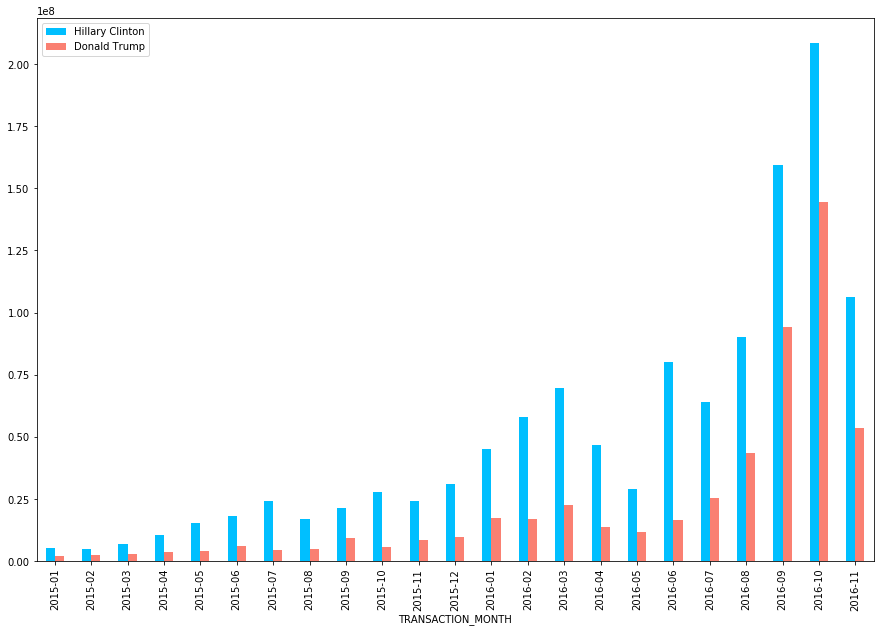

In [81]:
ax_exp = tr_cl_spend.plot(kind='bar', color=('deepskyblue', 'salmon'), figsize=(15, 10))

---

## Now we will investigate the chronological evolution of the contributions made to each of the two campaigns.

* First, we will need the file that contains each contribution or independent expenditure that one committee (or PAC or etc.) gives to another during the two-year election cycle. We will get this file from https://www.fec.gov/files/bulk-downloads/2016/oth16.zip

* But we will begin with reading the header of this file from here https://www.fec.gov/files/bulk-downloads/data_dictionaries/oth_header_file.csv

In [82]:
headers_oth = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/oth_header_file.csv')
headers_oth = headers_oth.columns.tolist()
headers_oth

['CMTE_ID',
 'AMNDT_IND',
 'RPT_TP',
 'TRANSACTION_PGI',
 'IMAGE_NUM',
 'TRANSACTION_TP',
 'ENTITY_TP',
 'NAME',
 'CITY',
 'STATE',
 'ZIP_CODE',
 'EMPLOYER',
 'OCCUPATION',
 'TRANSACTION_DT',
 'TRANSACTION_AMT',
 'OTHER_ID',
 'TRAN_ID',
 'FILE_NUM',
 'MEMO_CD',
 'MEMO_TEXT',
 'SUB_ID']

* Let's make transaction amount float and all the other columns string.

In [83]:
data_types_oth = { header: np.str for header in headers }
data_types_oth['TRANSACTION_AMT'] = np.float
data_types_oth

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

In [84]:
oth = pd.read_csv('data/itoth.txt', 
                  sep="|", 
                  index_col=False,
                  dtype=data_types_oth,
                  names=headers_oth,
                  parse_dates=['TRANSACTION_DT'])

print(oth.shape)
oth.head(5)

(2147090, 21)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00548198,N,M3,G2016,15950887602,24K,CCM,BLAINE FOR CONGRESS,JEFFERSON CITY,MO,...,NaN,NaN,02102015,2500.00,C00458679,6783511,998835,NaN,NaN,4032020151240895091
1,C00548198,N,M3,G2016,15950887602,24K,CCM,KEVIN MCCARTHY FOR CONGRESS,BAKERSFIELD,CA,...,NaN,NaN,02112015,1000.00,C00420935,6788487,998835,NaN,NaN,4032020151240895092
2,C00235739,N,M3,P2015,15950887797,24K,PTY,DEMOCRATIC SENATORIAL CAMPAIGN CMTE - BLDG FUND,WASHINGTON,DC,...,NaN,NaN,02272015,2500.00,C00042366,B546280,998836,NaN,NaN,4032020151240895114
3,C00235739,N,M3,P2015,15950887797,24K,PTY,NATIONAL REPUBLICAN CONGRESSIONAL CMTE - BLDG ...,WASHINGTON,DC,...,NaN,NaN,02272015,2500.00,C00075820,B546281,998836,NaN,NaN,4032020151240895115
4,C00235739,N,M3,P2015,15950887797,24K,PTY,NATIONAL REPUBLICAN SENATORIAL CMTE - BLDG FUND,WASHINGTON,DC,...,NaN,NaN,02272015,2500.00,C00027466,B546282,998836,NaN,NaN,4032020151240895116


* Let's create a new column for dates with dtype: datetime64[ns].
* And after that we will create a new column that will display only the year and the month (YYYY-mm) of each transaction.

In [85]:
oth['TRANSACTION_DT_2'] = pd.to_datetime(oth['TRANSACTION_DT'], format='%m%d%Y', errors='coerce')

In [86]:
oth['TRANSACTION_DT_2'].sample(5)

249887    2016-07-02
1362266   2016-05-04
1482109   2016-09-25
1766082   2016-06-27
714505    2016-10-15
Name: TRANSACTION_DT_2, dtype: datetime64[ns]

In [87]:
oth['TRANSACTION_MONTH'] = oth['TRANSACTION_DT_2'].dt.to_period('M')

In [88]:
oth['TRANSACTION_MONTH'].sample(5)

1955806   2016-09
1481559   2016-09
2039800   2016-10
1145305   2016-06
847659    2016-11
Name: TRANSACTION_MONTH, dtype: object

* Now, we will find the contributions to PACs that are in favor of Trump's campaign.

In [89]:
oth_trump_pacs = pd.merge(oth, 
               fec_trump[['CMTE_ID', 'CAND_NAME']], 
               on='CMTE_ID',
               how='inner')

print(oth_trump_pacs.shape)
oth_trump_pacs.sample(5)

(6188333, 24)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,TRANSACTION_DT_2,TRANSACTION_MONTH,CAND_NAME
4191666,C00553560,A,M4,G2016,201609109030766024,24A,ORG,FORTH RIGHT STRATEGY INC,WASHINGTON,DC,...,214.00,P00003392,SE.9299,1098461,X,NaN,4091220161316994659,2016-03-09,2016-03,"CLINTON, HILLARY"
251309,C00497420,A,Q3,G2016,201707319069911813,24A,ORG,STMP,ASHBURN,VA,...,1983.00,P00003392,B631879,1177174,NaN,NaN,4080320171442489890,2016-09-15,2016-09,"CLINTON, HILLARY"
4673304,C00553560,N,M7,G2016,201607209021923208,24A,ORG,FORTH RIGHT STRATEGY INC,WASHINGTON,DC,...,1263.00,P00003392,SE.26480,1089709,X,NaN,4080220161307749838,2016-06-06,2016-06,"CLINTON, HILLARY"
2368785,C00574533,N,Q1,P2016,201604159012564858,24A,ORG,REDPRINT STRATEGY,HERNDON,VA,...,468.00,P00003392,SB.178,1064275,NaN,NaN,4042820161284340858,2016-02-27,2016-02,"CLINTON, HILLARY"
2442589,C00157537,N,30G,G2016,201611309037581863,24E,ORG,"WEST VIRGINIANS FOR LIFE, INC.",MORGANTOWN,WV,...,2.00,H0WV01072,SE.7393,1127299,NaN,NaN,4120120161356385953,2016-11-11,2016-11,"TRUMP, DONALD"


* Let's check for duplicates and drop them.

In [90]:
oth_trump_pacs.duplicated().sum()

6157630

In [91]:
oth_trump_pacs = oth_trump_pacs.drop_duplicates()

* Now we will find the amount that PACs have contributed to Trump's campaign for each month.

In [92]:
tr_earnings_pacs = oth_trump_pacs.groupby('TRANSACTION_MONTH')['TRANSACTION_AMT'].sum().sort_index().reset_index(name='AMOUNT_EARNED')

tr_earnings_pacs

,TRANSACTION_MONTH,AMOUNT_EARNED
0,2014-11,1375.00
1,2015-01,81001.00
2,2015-02,190877.00
3,2015-03,2040308.00
4,2015-04,1254905.00
5,2015-05,967638.00
6,2015-06,1386798.00
7,2015-07,2156115.00
8,2015-08,2332003.00
9,2015-09,6038777.00


* Let's connect the committees with the 'oth' data set.
* After that, we will connect the canditate with each committee.

In [93]:
oth_cmties = pd.merge(oth, 
               cm[['CMTE_ID', 'CMTE_NM', 'CAND_ID']], 
               on='CMTE_ID', 
               how='inner')


oth_cmties = pd.merge(oth_cmties, 
               cn[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')


oth_cmties.loc[oth_cmties['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD'

oth_cmties.loc[oth_cmties['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY'


print(oth_cmties.shape)
oth_cmties.sample(5)

(959167, 27)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,TRANSACTION_DT_2,TRANSACTION_MONTH,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
698917,C00580100,A,M8,P2016,201811199133728264,15J,IND,"FAGAN, LEI",HAIKU,HI,...,1291697,X,NaN,4112020181618501394,2016-07-10,2016-07,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
799862,C00580100,A,M8,P2016,201811199133747639,15J,IND,"KOCIA AN, SUSAN",CORPUS CHRISTI,TX,...,1291697,X,NaN,4112020181618559518,2016-06-21,2016-06,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
215135,C00575795,A,12G,G2016,201701099041344909,15J,IND,"LEVINE, DEBORAH",CHEVY CHASE,MD,...,1137788,X,* HILLARY VICTORY FUND,4011120171366768182,2016-10-11,2016-10,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY",DEM
444774,C00575795,A,M7,P2016,201609189030910260,15J,IND,"CADDEY, JOHN",BEREA,OH,...,1099613,X,* HILLARY VICTORY FUND,4092020161317503533,2016-06-13,2016-06,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY",DEM
824602,C00580100,A,M8,P2016,201811199133762626,15J,IND,"NIX, CLIFFORD E MR.",ALEDO,TX,...,1291697,X,NaN,4112020181618604479,2016-07-12,2016-07,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP


* Now, we will get the committees that support Trump.

In [94]:
oth_trump_cmties = oth_cmties[oth_cmties['CAND_NAME'] == 'TRUMP, DONALD']

print(oth_trump_cmties.shape)
oth_trump_cmties.sample(5)

(330998, 27)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,TRANSACTION_DT_2,TRANSACTION_MONTH,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
837816,C00580100,A,M8,P2016,201811199133778464,15J,IND,"SMITH, CARL B MR.",VESTAVIA HILLS,AL,...,1291697,X,NaN,4112020181618651993,2016-07-01,2016-07,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
674822,C00580100,A,12G,G2016,201904059146022762,15J,IND,"STEADMAN, ROBERT",MANSFIELD,MA,...,1322657,X,NaN,4041020191646135243,2016-09-30,2016-09,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
761506,C00580100,A,M8,P2016,201811199133770349,15J,IND,"RENZ, RICHARD MR.",DANVILLE,PA,...,1291697,X,NaN,4112020181618627649,2016-07-06,2016-07,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
631072,C00580100,A,M8,P2016,201811199133769896,15J,IND,"REED, MICHAEL",LAKELAND,FL,...,1291697,X,NaN,4112020181618626288,2016-06-28,2016-06,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP
885223,C00580100,A,M8,P2016,201811199133771569,15J,IND,"ROBERTSON, BOB G MR.",COLUMBIA,MS,...,1291697,X,NaN,4112020181618631308,2016-07-12,2016-07,"DONALD J. TRUMP FOR PRESIDENT, INC.",P80001571,"TRUMP, DONALD",REP


In [95]:
oth_trump_cmties.duplicated().sum()

0

* Let's find the amount that committees have contributed to Trump's campaign for each month.

In [96]:
tr_earnings_cmties = oth_trump_cmties.groupby('TRANSACTION_MONTH')['TRANSACTION_AMT'].sum().sort_index().reset_index(name='AMOUNT_EARNED')

tr_earnings_cmties

,TRANSACTION_MONTH,AMOUNT_EARNED
0,2006-08,400.00
1,2015-04,292650.00
2,2015-05,430450.00
3,2015-06,1081647.00
4,2015-09,40050.00
5,2015-10,1091000.00
6,2015-11,2379275.00
7,2015-12,7470774.00
8,2016-01,4913761.00
9,2016-02,6850000.00


* Here we combine tha amounts that PACs and committees have contributed to Trump's campaign for each month.

In [97]:
tr_earnings = tr_earnings_pacs.append(tr_earnings_cmties).groupby('TRANSACTION_MONTH').sum().loc['2015-1':'2016-11']

tr_earnings

,AMOUNT_EARNED
TRANSACTION_MONTH,
2015-01,81001.00
2015-02,190877.00
2015-03,2040308.00
2015-04,1547555.00
2015-05,1398088.00
2015-06,2468445.00
2015-07,2156115.00
2015-08,2332003.00
2015-09,6078827.00


---

#### As you can see, the method and steps that we used investigate the chronological evolution of the expenditures made by the campaigns is the same that we used now, in order to investigate the chronological evolution of the expenditures made by the campaigns.

---

### So now, let's do the same for the contributions made to Clinton's campaign.
* The code will be packed, in order to save screen space and because there is no need to explain the same methods that was used before.

In [98]:
oth_clinton_pacs = pd.merge(oth, 
               fec_clinton[['CMTE_ID', 'CAND_NAME']], 
               on='CMTE_ID',
               how='inner')

print(oth_clinton_pacs.shape)
oth_clinton_pacs.sample(5)

(3183513, 24)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,TRANSACTION_DT_2,TRANSACTION_MONTH,CAND_NAME
1624578,C00487470,A,12G,G2016,201701309041557524,24A,ORG,WARFIELD & COMPANY,DELAPLANE,VA,...,10215.00,S6PA00266,SE.9963,1143465,NaN,NaN,4021020171370394334,2016-10-17,2016-10,"TRUMP, DONALD"
1423171,C00473918,N,M9,P2016,201609199030928524,24A,ORG,"MISSION CONTROL, INC.",GLASTONBURY,CT,...,4953.00,H6FL09187,VN7A7A27RM5,1099720,NaN,NaN,4091920161317237465,2016-08-18,2016-08,"CLINTON, HILLARY"
3063739,C00620583,A,30G,G2016,201708189070460799,24E,ORG,MOSAIC,HYATTSVILLE,MD,...,180.00,S6FL00319,VTDBC9SGW97,1179951,NaN,NaN,4082120171447697798,2016-11-03,2016-11,"CLINTON, HILLARY"
1652324,C00487470,A,M8,P2016,201701309041556248,24A,ORG,"BASK DIGITAL MEDIA, LLC",CARDIFF-BY-THE-SEA,CA,...,9500.00,H6KS01179,SE.9126,1143443,NaN,NaN,4021020171370393873,2016-07-26,2016-07,"TRUMP, DONALD"
2055930,C00489799,A,30G,G2016,201703179050877224,24A,ORG,TERRIS BARNES & WALTERS,SAN FRANCISCO,CA,...,2201.00,P80001571,B628190,1152643,NaN,NaN,4031720171380311131,2016-10-31,2016-10,"TRUMP, DONALD"


In [99]:
oth_clinton_pacs.duplicated().sum()

3140497

In [100]:
oth_clinton_pacs = oth_clinton_pacs.drop_duplicates()

In [101]:
cl_earnings_pacs = oth_clinton_pacs.groupby('TRANSACTION_MONTH')['TRANSACTION_AMT'].sum().sort_index().reset_index(name='AMOUNT_EARNED')

cl_earnings_pacs

,TRANSACTION_MONTH,AMOUNT_EARNED
0,2014-04,5000.00
1,2014-06,-25399.00
2,2015-01,1720972.00
3,2015-02,2285331.00
4,2015-03,2857653.00
5,2015-04,1351430.00
6,2015-05,1390333.00
7,2015-06,4242229.00
8,2015-07,3885463.00
9,2015-08,5632554.00


In [102]:
oth_clinton_cmties = oth_cmties[oth_cmties['CAND_NAME'] == 'CLINTON, HILLARY']

print(oth_clinton_cmties.shape)
oth_clinton_cmties.sample(5)

(625786, 27)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,TRANSACTION_DT_2,TRANSACTION_MONTH,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
344701,C00575795,A,M9,G2016,201611239037330985,15J,IND,"KUSMIN, ELLYN",LENOX,MA,...,1126762,X,* HILLARY VICTORY FUND,4113020161355260096,2016-08-08,2016-08,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY",DEM
204816,C00575795,A,12G,G2016,201701099041336498,15J,IND,"PULICE, GINA",RIDGEFIELD,CT,...,1137788,X,* HILLARY VICTORY FUND,4011120171366742948,2016-10-10,2016-10,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY",DEM
405545,C00575795,A,M9,G2016,201611239037340424,15J,IND,"LEE, THOMAS",WOODBRIDGE,VA,...,1126762,X,* HILLARY VICTORY FUND,4113020161355288415,2016-08-22,2016-08,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY",DEM
35227,C00575795,A,30G,G2016,201702149049663557,15J,IND,"BLAND, LORI",FAIRFAX,VA,...,1148953,X,* HILLARY VICTORY FUND,4021720171371823742,2016-10-26,2016-10,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY",DEM
218220,C00575795,A,12G,G2016,201701099041330502,15J,IND,"BRAY, MIKE",SHERMAN,IL,...,1137788,X,* HILLARY VICTORY FUND,4011120171366724959,2016-10-14,2016-10,HILLARY FOR AMERICA,P00003392,"CLINTON, HILLARY",DEM


In [103]:
oth_clinton_cmties.duplicated().sum()

0

In [104]:
cl_earnings_cmties = oth_clinton_cmties.groupby('TRANSACTION_MONTH')['TRANSACTION_AMT'].sum().sort_index().reset_index(name='AMOUNT_EARNED')

cl_earnings_cmties

,TRANSACTION_MONTH,AMOUNT_EARNED
0,2015-04,34900.00
1,2015-05,41050.00
2,2015-06,225220.00
3,2015-07,112796.00
4,2015-08,36850.00
5,2015-09,160155.00
6,2015-10,564566.00
7,2015-11,616428.00
8,2015-12,4118650.00
9,2016-01,1821753.00


In [105]:
cl_earnings = cl_earnings_pacs.append(cl_earnings_cmties).groupby('TRANSACTION_MONTH').sum().loc['2015-1':'2016-11']

cl_earnings

,AMOUNT_EARNED
TRANSACTION_MONTH,
2015-01,1720972.00
2015-02,2285331.00
2015-03,2857653.00
2015-04,1386330.00
2015-05,1431383.00
2015-06,4467449.00
2015-07,3998259.00
2015-08,5669404.00
2015-09,14810314.00


#### Now, let's combine the earnings of Trump's and Clinton's campaign.

In [106]:
tr_cl_earnings = cl_earnings.copy()

tr_cl_earnings["Donald Trump"] = tr_earnings.iloc[:, 0]

tr_cl_earnings.columns = ['Hillary Clinton', 'Donald Trump']
                            
tr_cl_earnings

,Hillary Clinton,Donald Trump
TRANSACTION_MONTH,,
2015-01,1720972.00,81001.00
2015-02,2285331.00,190877.00
2015-03,2857653.00,2040308.00
2015-04,1386330.00,1547555.00
2015-05,1431383.00,1398088.00
2015-06,4467449.00,2468445.00
2015-07,3998259.00,2156115.00
2015-08,5669404.00,2332003.00
2015-09,14810314.00,6078827.00


### Here we see the earnings of each campaign by each month.

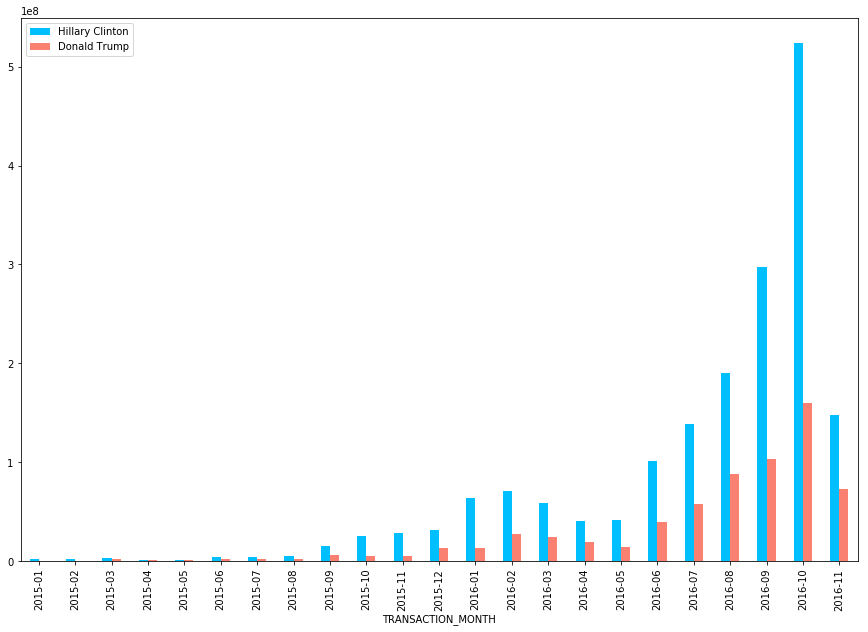

In [107]:
ax_earnings = tr_cl_earnings.plot(kind='bar', color=('deepskyblue', 'salmon'), figsize=(15, 10))

### Another important comparison would be to compare the earnings and expenditures of each campaign for each month.

---

* Let's begin with Trump's campaign.

In [108]:
tr_earnings_exp = tr_earnings.copy()

tr_earnings_exp["AMOUNT_SPENT"] = tr_spend.iloc[:, 0]

tr_earnings_exp.columns = ['AMOUNT_EARNED', 'AMOUNT_SPENT']
                            
tr_earnings_exp

,AMOUNT_EARNED,AMOUNT_SPENT
TRANSACTION_MONTH,,
2015-01,81001.00,2232699.37
2015-02,190877.00,2323494.30
2015-03,2040308.00,3001247.39
2015-04,1547555.00,3639380.66
2015-05,1398088.00,3952374.76
2015-06,2468445.00,6088070.74
2015-07,2156115.00,4286621.48
2015-08,2332003.00,4969624.35
2015-09,6078827.00,9298287.87


### Trump's campaign

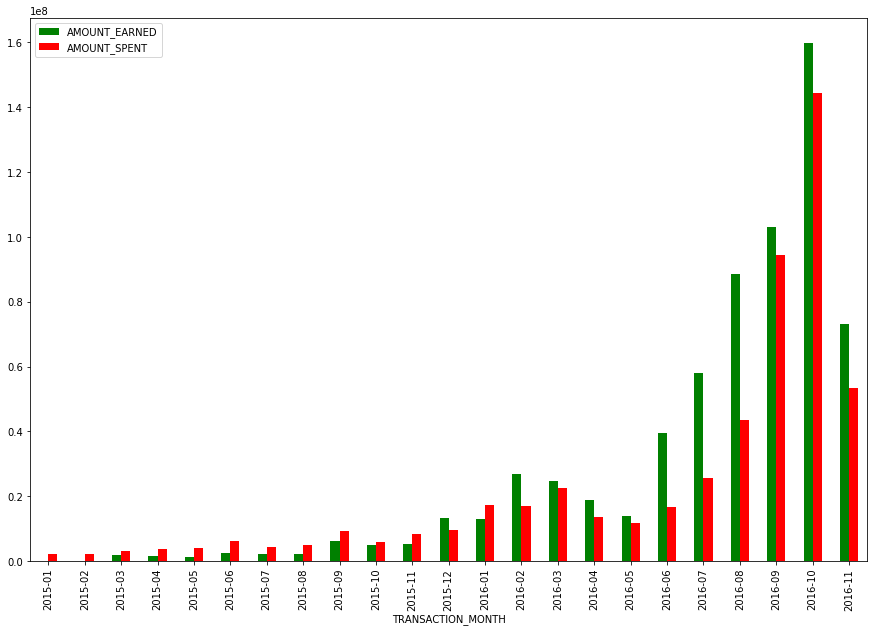

In [109]:
ax_earnings_exp_tr = tr_earnings_exp.plot(kind='bar', color=('green', 'red'), figsize=(15, 10))

In [110]:
tr_earnings_exp.sum()

AMOUNT_EARNED   660868619.00
AMOUNT_SPENT    523854023.12
dtype: float64

* Now let's continue with Clinton's campaign.

In [111]:
cl_earnings_exp = cl_earnings.copy()

cl_earnings_exp["AMOUNT_SPENT"] = cl_spend.iloc[:, 0]

cl_earnings_exp.columns = ['AMOUNT_EARNED', 'AMOUNT_SPENT']
                            
cl_earnings_exp

,AMOUNT_EARNED,AMOUNT_SPENT
TRANSACTION_MONTH,,
2015-01,1720972.00,5140075.14
2015-02,2285331.00,4897545.33
2015-03,2857653.00,6804217.15
2015-04,1386330.00,10715031.06
2015-05,1431383.00,15333996.91
2015-06,4467449.00,18019358.41
2015-07,3998259.00,24164228.08
2015-08,5669404.00,17144900.99
2015-09,14810314.00,21549874.53


### Clinton's campaign.

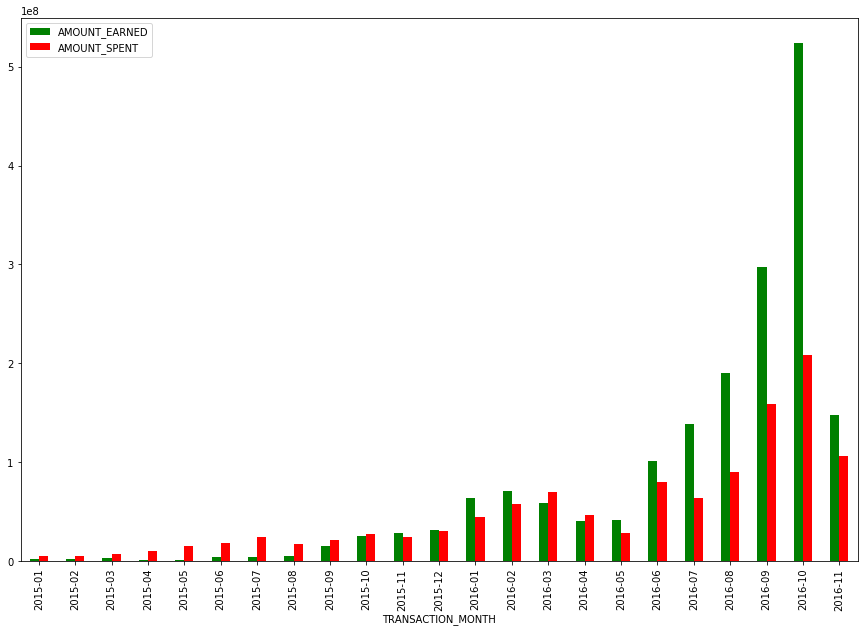

In [112]:
ax_earnings_exp_cl = cl_earnings_exp.plot(kind='bar', color=('green', 'red'), figsize=(15, 10))

In [113]:
cl_earnings_exp.sum()

AMOUNT_EARNED   1799812802.00
AMOUNT_SPENT    1162832861.01
dtype: float64

### Conclusions

It is obvious that both contributions and expenditures are starting to increase slowly 1 year before the elctions, and 4-5 months before the elections, they have a bigger increase. 

---

#### Disclaimer

* We see that the earned amount from clintons campaing is far more greater than the spent amount. So, let's make a research for it.
* As we see in https://www.bloomberg.com/politics/graphics/2016-presidential-campaign-fundraising/ , the raised amount is 1,190,700,000 which is far from 1,799,812,802 that we found.
* This means that probably we have treated the data in a wrong way.

# Question 4

### Let's identify the biggest recipients of campaign expenditures.

* We will begine with Trump and we will find the biggest recipients from campaign expenditures from committees (apart from PACs) that support Trump.

In [114]:
trump_exp_recipients_cmties = opexp_trump_cmties.groupby('NAME')['TRANSACTION_AMT'].sum()\
                                .sort_values(ascending=False).reset_index(name='TRANSACTION_AMT')

trump_exp_recipients_cmties.head(10)

,NAME,TRANSACTION_AMT
0,GILES-PARSCALE,87517503.33
1,AMERICAN MEDIA & ADVOCACY GROUP,74176379.30
2,"RICK REED MEDIA, INC.",24359873.08
3,AMERICAN EXPRESS,16004613.12
4,"ACE SPECIALTIES, LLC",15672154.34
5,"PRIVATE JET SERVICES, LLC",9735362.00
6,JAMESTOWN ASSOCIATES,8812842.01
7,"TAG AIR, INC.",8741464.25
8,AIR CHARTER TEAM,8208645.26
9,"CAMBRIDGE ANALYTICA, LLC",5600000.00


* Now, we will do the same but only for PACs.

In [115]:
trump_exp_recipients_pacs = opexp_trump_pacs.groupby('NAME')['TRANSACTION_AMT'].sum()\
                                .sort_values(ascending=False).reset_index(name='TRANSACTION_AMT')

trump_exp_recipients_pacs.head(10)

,NAME,TRANSACTION_AMT
0,SEIU GENERAL FUND,15297089.82
1,AFL-CIO COPE TREASURY,8268899.26
2,AFT SOLIDARITY 527,5761256.62
3,UNITE HERE TIP STATE & LOCAL FUND,4874275.22
4,ARDLEIGH GROUP,3873645.68
5,FOR OUR FUTURE ACTION FUND,3050817.27
6,"RFP SERVICES, LLC",3001452.43
7,ADP,2940185.92
8,DIRECT SUPPORT SERVICES INC,2914207.92
9,CONSOLIDATED MAILING SERVICES,2597122.31


* Let's combine the two data sets.

### Biggest recipients of Trump's campaign expenditures.

In [116]:
trump_exp_recipients = trump_exp_recipients_cmties.append(trump_exp_recipients_pacs).groupby('NAME').sum()\
                        .sort_values(by='TRANSACTION_AMT', ascending=False)

trump_exp_recipients.head(15)

,TRANSACTION_AMT
NAME,
GILES-PARSCALE,87517503.33
AMERICAN MEDIA & ADVOCACY GROUP,74176379.30
"RICK REED MEDIA, INC.",24460099.45
AMERICAN EXPRESS,16173357.45
"ACE SPECIALTIES, LLC",15672154.34
SEIU GENERAL FUND,15297089.82
"PRIVATE JET SERVICES, LLC",9735362.00
JAMESTOWN ASSOCIATES,8860921.01
"TAG AIR, INC.",8741464.25


Now, we will do exactly the same for Clinton.

In [117]:
clinton_exp_recipients_cmties = opexp_clinton_cmties.groupby('NAME')['TRANSACTION_AMT'].sum().sort_values(ascending=False).reset_index(name='TRANSACTION_AMT')

clinton_exp_recipients_cmties.head(10)

,NAME,TRANSACTION_AMT
0,GMMB,308463389.36
1,BULLY PULPIT INTERACTIVE LLC,33306462.95
2,ADP,27643574.05
3,AMERICAN EXPRESS,23558410.00
4,MARKHAM PRODUCTIONS,15861391.41
5,EXECUTIVE FLITEWAYS,15670058.91
6,"AIR PARTNERS, INC.",11156326.38
7,STRIPE,10197216.88
8,"MISSION CONTROL, INC.",5837599.86
9,AETNA,5692998.99


In [118]:
clinton_exp_recipients_pacs = opexp_clinton_pacs.groupby('NAME')['TRANSACTION_AMT'].sum().sort_values(ascending=False).reset_index(name='TRANSACTION_AMT')

clinton_exp_recipients_pacs.head(10)

,NAME,TRANSACTION_AMT
0,PRECISION NETWORK LLC,37845402.94
1,TARGETED PLATFORM MEDIA LLC,30445853.80
2,"TARGET ENTERPRISES, LLC",21381099.09
3,WATERFRONT STRATEGIES,21191510.60
4,BULLY PULPIT INTERACTIVE LLC,16158769.64
5,SEIU GENERAL FUND,15503322.76
6,PAYROLL DATA PROCESSING,14585736.74
7,NEXTGEN CLIMATE ACTION,12045870.06
8,AFL-CIO COPE TREASURY,8268899.26
9,PROJECT NEW AMERICA,6439818.48


### Biggest recipients of Clinton's campaign expenditures.

In [119]:
clinton_exp_recipients = clinton_exp_recipients_cmties.append(clinton_exp_recipients_pacs).groupby('NAME').sum()\
                        .sort_values(by='TRANSACTION_AMT', ascending=False)

clinton_exp_recipients.head(15)

,TRANSACTION_AMT
NAME,
GMMB,308463389.36
BULLY PULPIT INTERACTIVE LLC,49465232.59
PRECISION NETWORK LLC,37845402.94
TARGETED PLATFORM MEDIA LLC,30445853.80
ADP,30295272.92
AMERICAN EXPRESS,28614459.42
"TARGET ENTERPRISES, LLC",21381099.09
WATERFRONT STRATEGIES,21191510.60
MARKHAM PRODUCTIONS,15861391.41


# Question 5

### Here we will examine the geographical distribution, at the state level, of campaign expenditures. For each state, we will calculate the expenditures per voter and we will examine the situation for swing states.

* Let's begin with finding the amount that committees (apart from PACs), that support Trump, have spent to each state.

In [120]:
states_grouped_tr_cmties = opexp_trump_cmties.groupby('STATE').sum().sort_values(by='TRANSACTION_AMT', ascending=False)

states_grouped_tr_cmties.head(10)

,TRANSACTION_AMT
STATE,
VA,110289113.50
TX,96955722.35
NY,27064020.33
LA,16886860.45
NJ,15795551.11
FL,14656612.83
NH,11359030.27
MO,9410068.14
CA,8968198.36


* Now, lets do the same with PACs only.

In [121]:
states_grouped_tr_pacs = opexp_trump_pacs.groupby('STATE').sum().sort_values(by='TRANSACTION_AMT', ascending=False)

states_grouped_tr_pacs.head(10)

,TRANSACTION_AMT
STATE,
DC,74729573.84
VA,29534245.19
NY,10530754.74
MD,6119443.57
CA,5519014.27
OH,4537866.54
IA,3980475.68
FL,3651899.71
AZ,3396420.65


* Now, we will combine the two data sets.

In [122]:
states_grouped_trump = states_grouped_tr_cmties.append(states_grouped_tr_pacs).groupby('STATE').sum()\
                        .sort_values(by='TRANSACTION_AMT', ascending=False)

states_grouped_trump.head(10)

,TRANSACTION_AMT
STATE,
VA,139823358.69
TX,98838942.67
DC,81659767.07
NY,37594775.07
FL,18308512.54
LA,16989545.61
NJ,16256893.42
CA,14487212.63
NH,12519597.18


* Finally, we will normalize in order to get the percentages.

In [123]:
states_norm_trump = states_grouped_trump.div(states_grouped_trump.sum(axis=0), axis=1)

states_norm_trump[:10]

,TRANSACTION_AMT
STATE,
VA,0.26
TX,0.19
DC,0.15
NY,0.07
FL,0.03
LA,0.03
NJ,0.03
CA,0.03
NH,0.02


### Trump's geographical distribution of campaign expenditures (in percentage of total campaign expenditures).

* To do the actual map drawing, we'll use [cartopy](https://scitools.org.uk/cartopy/docs/latest/), a Python library for drawing on maps.

* Note that in order to run the example, you will need to install cartopy following the instructions at https://scitools.org.uk/cartopy/docs/latest/installing.html#installing.

* The example is adapted from:

  * https://scitools.org.uk/cartopy/docs/latest/gallery/hurricane_katrina.html#sphx-glr-gallery-hurricane-katrina-py
  
  * https://stackoverflow.com/a/53293426
  
  * https://stackoverflow.com/a/55607162


* Also, the colors are from https://matplotlib.org/3.1.0/gallery/color/named_colors.html

* The same sources apply to all the maps below.

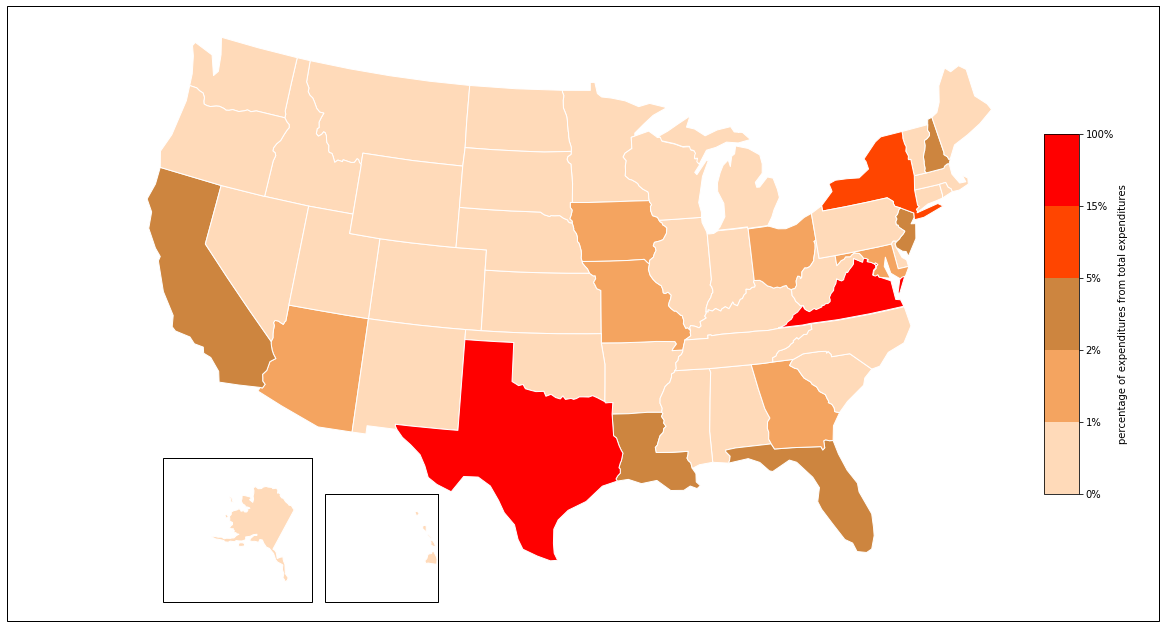

In [124]:
import matplotlib.pyplot as plt
from matplotlib.colorbar import ColorbarBase
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib as mpl

fig = plt.figure(figsize=(16, 10))

projection=ccrs.LambertConformal()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=projection, frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

# Hawaii
axhi = fig.add_axes([0.25, .1, 0.15, 0.15], projection=projection)
axhi.set_extent([-155, -165, 20, 15])
axhi.patch.set_visible(False)
# Alaska
axak = fig.add_axes([0.1, 0.1, 0.2, 0.2], projection=projection)
axak.set_extent([-185, -130, 70, 50])
axak.patch.set_visible(False)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

cmap = mpl.colors.ListedColormap(['peachpuff', 'sandybrown', 'peru', 'orangered', 'red'])

for state in shpreader.Reader(states_shp).records():
    postal = state.attributes['postal']
    statistic = states_norm_trump.loc[postal]
    if postal == 'AK':
        axes = axak
    elif postal == 'HI':
        axes = axhi
    else:
        axes = ax
    
    if statistic['TRANSACTION_AMT'] <= 0.01:
        color = 'peachpuff'
    elif statistic['TRANSACTION_AMT'] <= 0.02:
        color = 'sandybrown'
    elif statistic['TRANSACTION_AMT'] <= 0.05:
        color = 'peru'
    elif statistic['TRANSACTION_AMT'] <= 0.15:
        color = 'orangered'
    else:
        color = 'red'
        
    axes.add_geometries([state.geometry], ccrs.PlateCarree(),
                        facecolor=color, 
                        edgecolor='white',
                        linewidth=1)
    
ax_c = fig.add_axes([.9, 0.25, 0.03, 0.5])
cb = ColorbarBase(ax_c, cmap=cmap, orientation='vertical',
                  label=r'percentage of expenditures from total expenditures')
cb.set_ticks([0, .2, .4, .6, .8, 1])
cb.set_ticklabels(['0%', '1%', '2%', '5%', '15%', '100%'])

* Now, we will do the same steps for Clinton as we did for Trump.

In [125]:
states_grouped_cl_cmties = opexp_clinton_cmties.groupby('STATE').sum().sort_values(by='TRANSACTION_AMT', ascending=False)

states_grouped_cl_cmties.head(10)

,TRANSACTION_AMT
STATE,
DC,352841690.99
NY,79465383.54
NJ,53660413.29
CA,16597571.62
AR,16211260.85
FL,12467966.65
CT,10995615.35
WA,8530152.18
VA,7705911.53


In [126]:
states_grouped_cl_pacs = opexp_clinton_pacs.groupby('STATE').sum().sort_values(by='TRANSACTION_AMT', ascending=False)

states_grouped_cl_pacs.head(10)

,TRANSACTION_AMT
STATE,
DC,225451085.37
CA,61867982.54
MD,45022993.19
NY,39869471.64
VA,33505727.73
FL,21752205.41
OH,17414295.72
PA,16837533.38
CO,16600043.87


In [127]:
states_grouped_clinton = states_grouped_cl_cmties.append(states_grouped_cl_pacs).groupby('STATE').sum()\
                        .sort_values(by='TRANSACTION_AMT', ascending=False)

states_grouped_clinton.head(10)

,TRANSACTION_AMT
STATE,
DC,578292776.36
NY,119334855.18
CA,78465554.16
NJ,57127418.29
MD,46885222.70
VA,41211639.26
FL,34220172.06
CO,21653609.04
IL,21452803.80


In [128]:
states_norm_clinton = states_grouped_clinton.div(states_grouped_clinton.sum(axis=0), axis=1)

states_norm_clinton[:10]

,TRANSACTION_AMT
STATE,
DC,0.49
NY,0.10
CA,0.07
NJ,0.05
MD,0.04
VA,0.04
FL,0.03
CO,0.02
IL,0.02


### Clinton's geographical distribution of campaign expenditures (in percentage of total campaign expenditures).

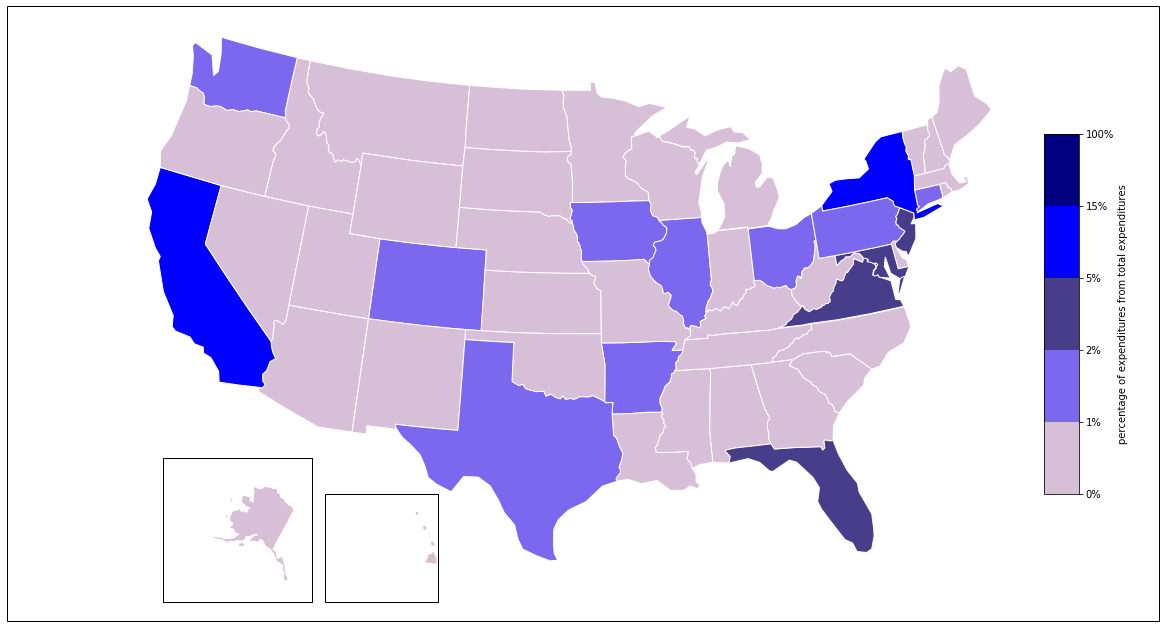

In [129]:
fig = plt.figure(figsize=(16, 10))

projection=ccrs.LambertConformal()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=projection, frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

# Hawaii
axhi = fig.add_axes([0.25, .1, 0.15, 0.15], projection=projection)
axhi.set_extent([-155, -165, 20, 15])
axhi.patch.set_visible(False)
# Alaska
axak = fig.add_axes([0.1, 0.1, 0.2, 0.2], projection=projection)
axak.set_extent([-185, -130, 70, 50])
axak.patch.set_visible(False)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

cmap = mpl.colors.ListedColormap(['thistle', 'mediumslateblue', 'darkslateblue', 'blue', 'navy'])

for state in shpreader.Reader(states_shp).records():
    postal = state.attributes['postal']
    statistic = states_norm_clinton.loc[postal]
    if postal == 'AK':
        axes = axak
    elif postal == 'HI':
        axes = axhi
    else:
        axes = ax
    
    if statistic['TRANSACTION_AMT'] <= 0.01:
        color = 'thistle'
    elif statistic['TRANSACTION_AMT'] <= 0.02:
        color = 'mediumslateblue'
    elif statistic['TRANSACTION_AMT'] <= 0.05:
        color = 'darkslateblue'
    elif statistic['TRANSACTION_AMT'] <= 0.15:
        color = 'blue'
    else:
        color = 'navy'
        
    axes.add_geometries([state.geometry], ccrs.PlateCarree(),
                        facecolor=color, 
                        edgecolor='white',
                        linewidth=1)
    
ax_c = fig.add_axes([.9, 0.25, 0.03, 0.5])
cb = ColorbarBase(ax_c, cmap=cmap, orientation='vertical',
                  label=r'percentage of expenditures from total expenditures')
cb.set_ticks([0, .2, .4, .6, .8, 1])
cb.set_ticklabels(['0%', '1%', '2%', '5%', '15%', '100%'])

* An important state that is not visible in the map is DC where 49% of the total expenditures was spent.

---

* It would be also interesting to see the percentage difference of campaign expenditures, by the two candidates, on a map.
* So, let's groub the amount in one data set.

In [130]:
states_grouped = states_grouped_clinton.copy()

states_grouped['Donald Trump'] = states_grouped_trump['TRANSACTION_AMT'].copy()

states_grouped.columns = ['Hillary Clinton', 'Donald Trump']

states_grouped[:10]

,Hillary Clinton,Donald Trump
STATE,,
DC,578292776.36,81659767.07
NY,119334855.18,37594775.07
CA,78465554.16,14487212.63
NJ,57127418.29,16256893.42
MD,46885222.70,6586243.64
VA,41211639.26,139823358.69
FL,34220172.06,18308512.54
CO,21653609.04,4790135.73
IL,21452803.80,3211462.42


* Now, we will normalize as before.

In [131]:
states_norm = states_grouped.div(states_grouped.sum(axis=1), axis=0)

states_norm[:10]

,Hillary Clinton,Donald Trump
STATE,,
DC,0.88,0.12
NY,0.76,0.24
CA,0.84,0.16
NJ,0.78,0.22
MD,0.88,0.12
VA,0.23,0.77
FL,0.65,0.35
CO,0.82,0.18
IL,0.87,0.13


* And now we will print the map.

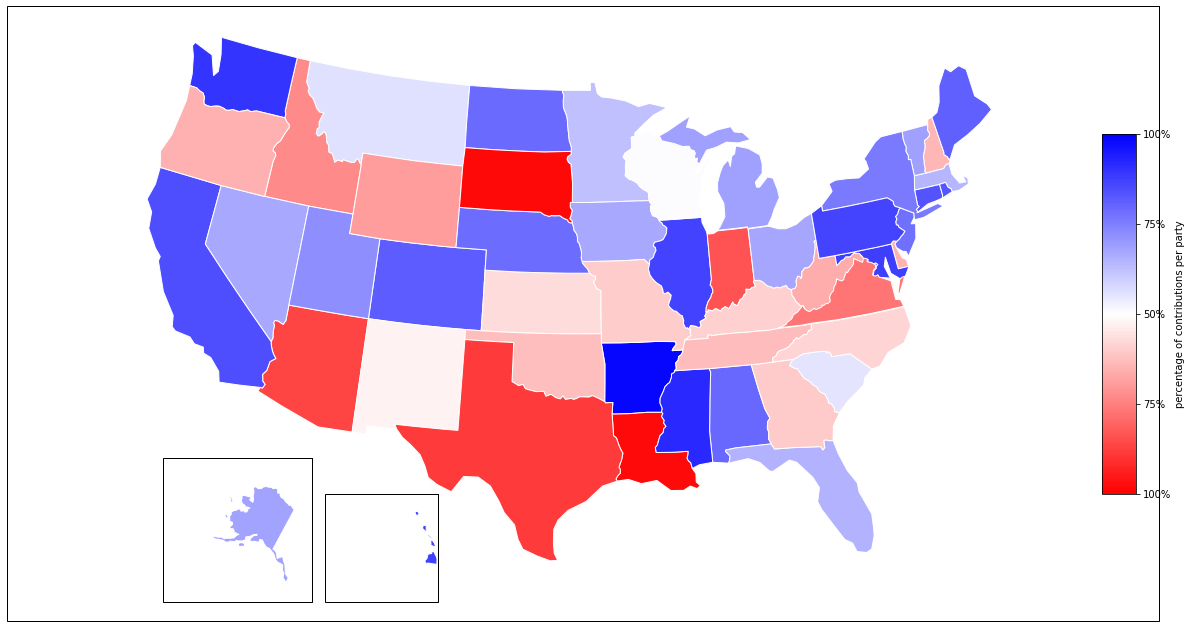

In [132]:
fig = plt.figure(figsize=(16, 10))

projection=ccrs.LambertConformal()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=projection, frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

# Hawaii
axhi = fig.add_axes([0.25, .1, 0.15, 0.15], projection=projection)
axhi.set_extent([-155, -165, 20, 15])
axhi.patch.set_visible(False)
# Alaska
axak = fig.add_axes([0.1, 0.1, 0.2, 0.2], projection=projection)
axak.set_extent([-185, -130, 70, 50])
axak.patch.set_visible(False)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

cmap = plt.cm.bwr_r

for state in shpreader.Reader(states_shp).records():
    postal = state.attributes['postal']
    statistic = states_norm.loc[postal]
    if postal == 'AK':
        axes = axak
    elif postal == 'HI':
        axes = axhi
    else:
        axes = ax
    axes.add_geometries([state.geometry], ccrs.PlateCarree(),
                        facecolor=cmap(statistic)[0], 
                        edgecolor='white',
                        linewidth=1)
    
ax_c = fig.add_axes([.95, 0.25, 0.03, 0.5])
cb = ColorbarBase(ax_c, cmap=cmap, orientation='vertical',
                  label=r'percentage of contributions per party')
cb.set_ticks([0, .25, .5, .75, 1])
cb.set_ticklabels(['100%', '75%', '50%', '75%', '100%'])

* Now, we need the number of registered voters per state.
* Here is the source https://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-580.html
* And here is the xlsx link https://www2.census.gov/programs-surveys/cps/tables/p20/580/table04a.xlsx

In [133]:
population_state = pd.read_excel('https://www2.census.gov/programs-surveys/cps/tables/p20/580/table04a.xlsx', 
                  index_col=0, skiprows=4)

population_state.head(5)

,Unnamed: 1,Unnamed: 2,Total registered,Percent registered (Total),Margin of Error 1,Percent registered (Citizen),Margin of Error 1.1,Total voted,Percent voted (Total),Margin of Error 1.2,Percent voted (Citizen),Margin of Error 1.3
UNITED STATES,245502.00,224059.00,157596.00,64.19,0.30,70.34,0.30,137537.00,56.02,0.31,61.38,0.32
ALABAMA,3717.00,3651.00,2526.00,67.96,2.50,69.18,2.50,2095.00,56.37,2.66,57.38,2.68
ALASKA,518.00,502.00,358.00,69.07,2.65,71.30,2.63,308.00,59.41,2.82,61.33,2.84
ARIZONA,5196.00,4585.00,3145.00,60.53,2.25,68.61,2.27,2769.00,53.29,2.29,60.40,2.39
ARKANSAS,2216.00,2116.00,1456.00,65.69,2.65,68.80,2.65,1241.00,56.01,2.77,58.67,2.81


* From this data set we only need the indexes and the column `Total registered`.

In [134]:
population_state['Total registered'] =population_state['Total registered'] * 1000

population_state.head(5)

,Unnamed: 1,Unnamed: 2,Total registered,Percent registered (Total),Margin of Error 1,Percent registered (Citizen),Margin of Error 1.1,Total voted,Percent voted (Total),Margin of Error 1.2,Percent voted (Citizen),Margin of Error 1.3
UNITED STATES,245502.00,224059.00,157596000.00,64.19,0.30,70.34,0.30,137537.00,56.02,0.31,61.38,0.32
ALABAMA,3717.00,3651.00,2526000.00,67.96,2.50,69.18,2.50,2095.00,56.37,2.66,57.38,2.68
ALASKA,518.00,502.00,358000.00,69.07,2.65,71.30,2.63,308.00,59.41,2.82,61.33,2.84
ARIZONA,5196.00,4585.00,3145000.00,60.53,2.25,68.61,2.27,2769.00,53.29,2.29,60.40,2.39
ARKANSAS,2216.00,2116.00,1456000.00,65.69,2.65,68.80,2.65,1241.00,56.01,2.77,58.67,2.81


In [135]:
population_state = population_state[['Total registered']]

population_state.head(5)

,Total registered
UNITED STATES,157596000.00
ALABAMA,2526000.00
ALASKA,358000.00
ARIZONA,3145000.00
ARKANSAS,1456000.00


* Let's get rid of the first row because we don't need it.

In [136]:
population_state = population_state.iloc[1:]

population_state.head(5)

,Total registered
ALABAMA,2526000.00
ALASKA,358000.00
ARIZONA,3145000.00
ARKANSAS,1456000.00
CALIFORNIA,16096000.00


In [137]:
population_state.tail(5)

,Total registered
WISCONSIN,3323000.00
WYOMING,304000.00
NaN,nan
1 This figure added to or subtracted from the estimate provides the 90-percent confidence interval.,nan
"Source: U.S. Census Bureau, Current Population Survey,November 2016",nan


* Let's also remove the last tree rows.

In [138]:
population_state.drop(population_state.tail(3).index,inplace=True) 

population_state.tail(5)

,Total registered
VIRGINIA,4399000.00
WASHINGTON,3906000.00
WEST VIRGINIA,913000.00
WISCONSIN,3323000.00
WYOMING,304000.00


* Now we must convert each state to its abbreviation.
* I copied and pasted the below data from https://gist.github.com/rogerallen/1583593.

In [139]:
us_state_abbrev = {
    'ALABAMA': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [140]:
indexes = population_state.index
indexes

Index(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO',
       'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA',
       'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY',
       'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN',
       'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'],
      dtype='object')

* As we see the indexes of `population_state` are in uppercase letters.
* So we will rename all sates to uppercase letters.

In [141]:
states = {}
for state in us_state_abbrev:
    new_key = state.upper()
    old_key = state
    states[new_key] = us_state_abbrev[old_key]


In [142]:
states

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'AMERICAN SAMOA': 'AS',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'GUAM': 'GU',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'NORTHERN MARIANA ISLANDS': 'MP',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'PUERTO RICO': 'PR',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 '

* Now, we will rename the indexes of `population_state` to their abbreviations.

In [143]:
for state in states:
    population_state = population_state.rename(index={state : states[state]})

In [144]:
population_state.head(5)

,Total registered
AL,2526000.00
AK,358000.00
AZ,3145000.00
AR,1456000.00
CA,16096000.00


* Let's connect the Trump's expenditure with the total voters for each state.

In [145]:
exp_per_voter_tr = states_grouped_trump.copy()
exp_per_voter_tr['TOTAL_VOTERS'] = population_state['Total registered']
exp_per_voter_tr.head(5)

,TRANSACTION_AMT,TOTAL_VOTERS
STATE,,
VA,139823358.69,4399000.00
TX,98838942.67,11724000.00
DC,81659767.07,420000.00
NY,37594775.07,9142000.00
FL,18308512.54,9604000.00


* Now, we will find the expenditure per voter by dividing.

In [146]:
exp_per_voter_tr['EXPENDITURE_PER_VOTER'] = exp_per_voter_tr['TRANSACTION_AMT'] / exp_per_voter_tr['TOTAL_VOTERS']

exp_per_voter_tr.sort_values(by='EXPENDITURE_PER_VOTER', ascending=False).head(10)

,TRANSACTION_AMT,TOTAL_VOTERS,EXPENDITURE_PER_VOTER
STATE,,,
DC,81659767.07,420000.00,194.43
VA,139823358.69,4399000.00,31.79
NH,12519597.18,763000.00,16.41
TX,98838942.67,11724000.00,8.43
LA,16989545.61,2446000.00,6.95
DE,3293949.32,487000.00,6.76
SD,2419804.88,437000.00,5.54
NY,37594775.07,9142000.00,4.11
IA,6559736.49,1657000.00,3.96


### Trump's geographical distribution of campaign expenditures per state voter (in dollars).

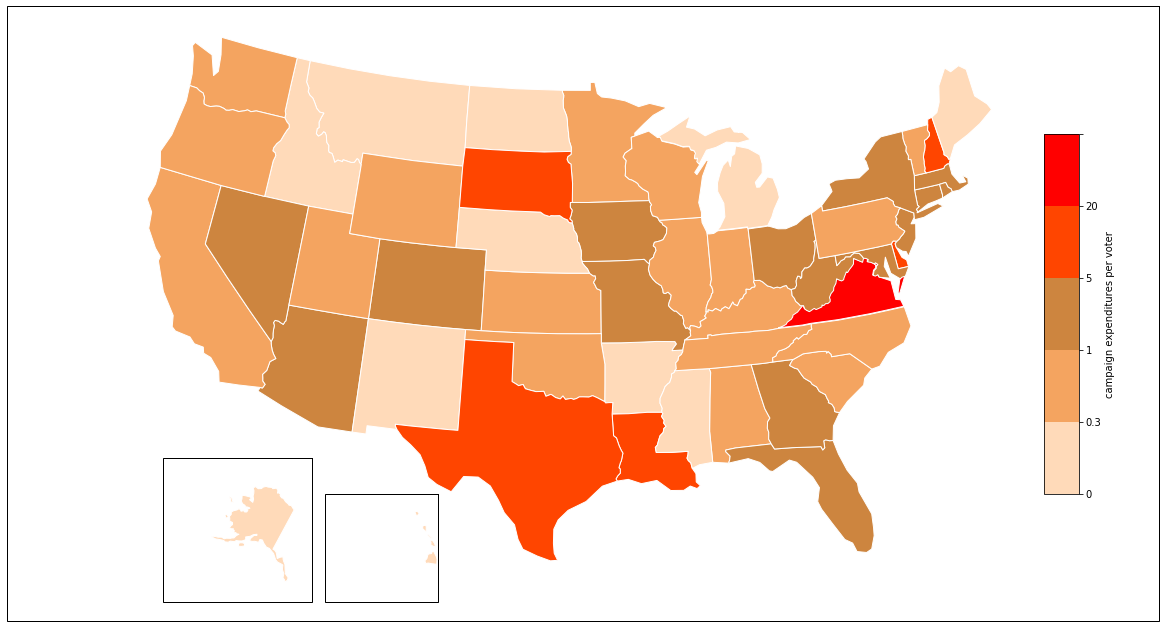

In [147]:
fig = plt.figure(figsize=(16, 10))

projection=ccrs.LambertConformal()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=projection, frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

# Hawaii
axhi = fig.add_axes([0.25, .1, 0.15, 0.15], projection=projection)
axhi.set_extent([-155, -165, 20, 15])
axhi.patch.set_visible(False)
# Alaska
axak = fig.add_axes([0.1, 0.1, 0.2, 0.2], projection=projection)
axak.set_extent([-185, -130, 70, 50])
axak.patch.set_visible(False)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

cmap = mpl.colors.ListedColormap(['peachpuff', 'sandybrown', 'peru', 'orangered', 'red'])

for state in shpreader.Reader(states_shp).records():
    postal = state.attributes['postal']
    statistic = exp_per_voter_tr.loc[postal]
    if postal == 'AK':
        axes = axak
    elif postal == 'HI':
        axes = axhi
    else:
        axes = ax
    
    if statistic['EXPENDITURE_PER_VOTER'] <= 0.3:
        color = 'peachpuff'
    elif statistic['EXPENDITURE_PER_VOTER'] <= 1:
        color = 'sandybrown'
    elif statistic['EXPENDITURE_PER_VOTER'] <= 5:
        color = 'peru'
    elif statistic['EXPENDITURE_PER_VOTER'] <= 20:
        color = 'orangered'
    else:
        color = 'red'
        
    axes.add_geometries([state.geometry], ccrs.PlateCarree(),
                        facecolor=color, 
                        edgecolor='white',
                        linewidth=1)
    
ax_c = fig.add_axes([.9, 0.25, 0.03, 0.5])
cb = ColorbarBase(ax_c, cmap=cmap, orientation='vertical',
                  label=r'campaign expenditures per voter')
cb.set_ticks([0, .2, .4, .6, .8, 1])
cb.set_ticklabels(['0', '0.3', '1', '5', '20', ''])

* Now, let's do exactly the same for Clinton.

In [148]:
exp_per_voter_cl = states_grouped_clinton.copy()
exp_per_voter_cl['TOTAL_VOTERS'] = population_state['Total registered']
exp_per_voter_cl.head(5)

,TRANSACTION_AMT,TOTAL_VOTERS
STATE,,
DC,578292776.36,420000.00
NY,119334855.18,9142000.00
CA,78465554.16,16096000.00
NJ,57127418.29,4165000.00
MD,46885222.70,3114000.00


In [149]:
exp_per_voter_cl['EXPENDITURE_PER_VOTER'] = exp_per_voter_cl['TRANSACTION_AMT'] / exp_per_voter_cl['TOTAL_VOTERS']

exp_per_voter_cl.sort_values(by='EXPENDITURE_PER_VOTER', ascending=False).head(10)

,TRANSACTION_AMT,TOTAL_VOTERS,EXPENDITURE_PER_VOTER
STATE,,,
DC,578292776.36,420000.00,1376.89
MD,46885222.70,3114000.00,15.06
NJ,57127418.29,4165000.00,13.72
NY,119334855.18,9142000.00,13.05
AR,17069609.94,1456000.00,11.72
VA,41211639.26,4399000.00,9.37
NH,6969867.83,763000.00,9.13
IA,13403661.46,1657000.00,8.09
CO,21653609.04,2893000.00,7.48


### Clinton's geographical distribution of campaign expenditures per state voter (in dollars).

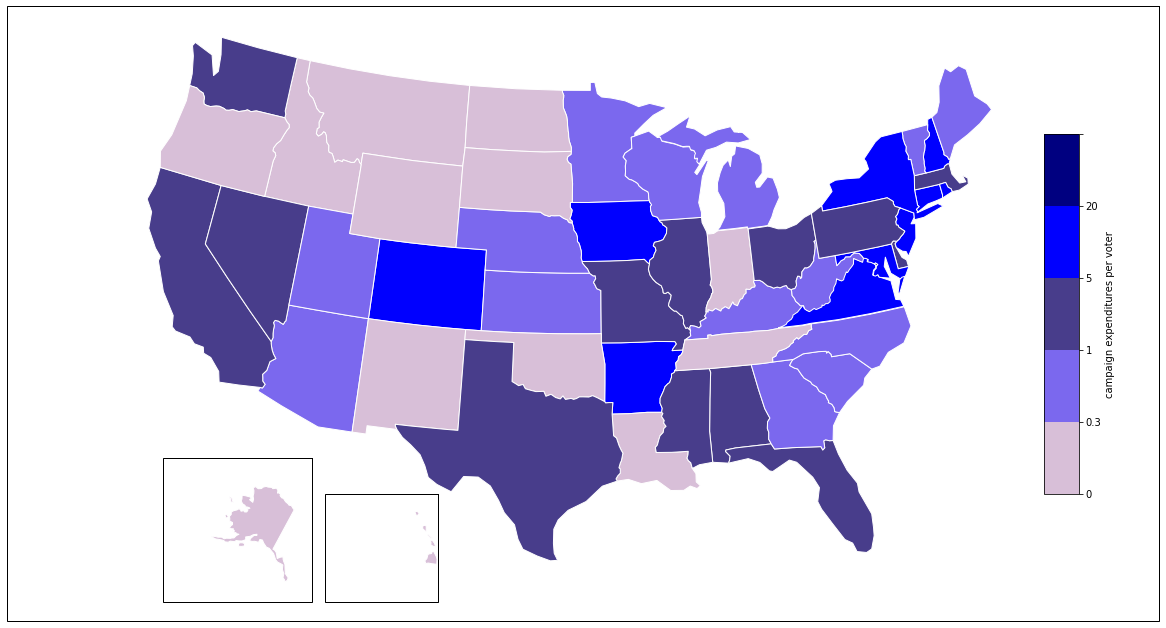

In [150]:
fig = plt.figure(figsize=(16, 10))

projection=ccrs.LambertConformal()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=projection, frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

# Hawaii
axhi = fig.add_axes([0.25, .1, 0.15, 0.15], projection=projection)
axhi.set_extent([-155, -165, 20, 15])
axhi.patch.set_visible(False)
# Alaska
axak = fig.add_axes([0.1, 0.1, 0.2, 0.2], projection=projection)
axak.set_extent([-185, -130, 70, 50])
axak.patch.set_visible(False)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

cmap = mpl.colors.ListedColormap(['thistle', 'mediumslateblue', 'darkslateblue', 'blue', 'navy'])

for state in shpreader.Reader(states_shp).records():
    postal = state.attributes['postal']
    statistic = exp_per_voter_cl.loc[postal]
    if postal == 'AK':
        axes = axak
    elif postal == 'HI':
        axes = axhi
    else:
        axes = ax
    
    if statistic['EXPENDITURE_PER_VOTER'] <= 0.3:
        color = 'thistle'
    elif statistic['EXPENDITURE_PER_VOTER'] <= 1:
        color = 'mediumslateblue'
    elif statistic['EXPENDITURE_PER_VOTER'] <= 5:
        color = 'darkslateblue'
    elif statistic['EXPENDITURE_PER_VOTER'] <= 20:
        color = 'blue'
    else:
        color = 'navy'
        
    axes.add_geometries([state.geometry], ccrs.PlateCarree(),
                        facecolor=color, 
                        edgecolor='white',
                        linewidth=1)
    
ax_c = fig.add_axes([.9, 0.25, 0.03, 0.5])
cb = ColorbarBase(ax_c, cmap=cmap, orientation='vertical',
                  label=r'campaign expenditures per voter')
cb.set_ticks([0, .2, .4, .6, .8, 1])
cb.set_ticklabels(['0', '0.3', '1', '5', '20', ''])



* Let's find out what happended in the swing states.
* Here are the swing states list for the 2016 elections https://en.wikipedia.org/wiki/Swing_state#Swing_states_by_results.

In [151]:
swing_states = ['ME', 'NV', 'MN', 'NH', 'MI', 'PA', 'WI', 'FL', 'AZ', 'NC', 'GA']

### Swing States

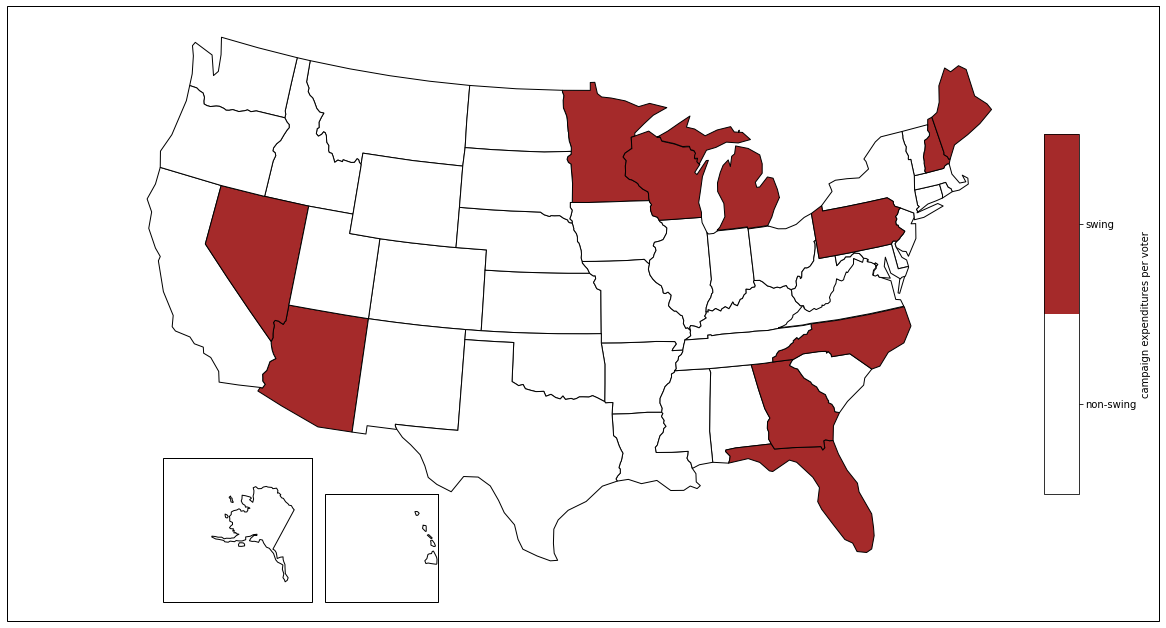

In [152]:

fig = plt.figure(figsize=(16, 10))

projection=ccrs.LambertConformal()
# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=projection, frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

# Hawaii
axhi = fig.add_axes([0.25, .1, 0.15, 0.15], projection=projection)
axhi.set_extent([-155, -165, 20, 15])
axhi.patch.set_visible(False)
# Alaska
axak = fig.add_axes([0.1, 0.1, 0.2, 0.2], projection=projection)
axak.set_extent([-185, -130, 70, 50])
axak.patch.set_visible(False)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

cmap = mpl.colors.ListedColormap(['white', 'brown'])

for state in shpreader.Reader(states_shp).records():
    postal = state.attributes['postal']
    statistic = exp_per_voter_cl.loc[postal]
    if postal == 'AK':
        axes = axak
    elif postal == 'HI':
        axes = axhi
    else:
        axes = ax
    
    if postal in swing_states: 
        color = 'brown'
    else:
        color = 'white'
        
    axes.add_geometries([state.geometry], ccrs.PlateCarree(),
                        facecolor=color, 
                        edgecolor='black',
                        linewidth=1)
    
ax_c = fig.add_axes([.9, 0.25, 0.03, 0.5])
cb = ColorbarBase(ax_c, cmap=cmap, orientation='vertical',
                  label=r'campaign expenditures per voter')
cb.set_ticks([0.25, .75])
cb.set_ticklabels(['non-swing', 'swing'])

* Let's find the Trump's campaign expenditure per voter for each swing state.

In [153]:
swings_tr = exp_per_voter_tr[exp_per_voter_tr.index.isin(swing_states)]

swings_tr.sort_values(by='EXPENDITURE_PER_VOTER', ascending=False)

,TRANSACTION_AMT,TOTAL_VOTERS,EXPENDITURE_PER_VOTER
STATE,,,
NH,12519597.18,763000.00,16.41
AZ,6778749.06,3145000.00,2.16
FL,18308512.54,9604000.00,1.91
NV,2004577.17,1371000.00,1.46
GA,6015053.47,4892000.00,1.23
NC,3070907.38,5194000.00,0.59
MN,1474393.05,3055000.00,0.48
WI,1533103.22,3323000.00,0.46
PA,3136819.14,6909000.00,0.45


* Let's do the same for Clinton.

In [154]:
swings_cl = exp_per_voter_cl[exp_per_voter_cl.index.isin(swing_states)]

swings_cl.sort_values(by='EXPENDITURE_PER_VOTER', ascending=False)

,TRANSACTION_AMT,TOTAL_VOTERS,EXPENDITURE_PER_VOTER
STATE,,,
NH,6969867.83,763000.00,9.13
FL,34220172.06,9604000.00,3.56
NV,4062191.35,1371000.00,2.96
PA,20385815.11,6909000.00,2.95
GA,3951389.73,4892000.00,0.81
MN,2434618.96,3055000.00,0.80
ME,503873.94,830000.00,0.61
WI,1580418.12,3323000.00,0.48
NC,2193261.61,5194000.00,0.42


* Now, we will calculate the average numbers and medians of Trump's and Clinton's campaign expenditures for all states and then only for swing states, in order to identify what happens about them.

In [155]:
avg_tr = exp_per_voter_tr['EXPENDITURE_PER_VOTER'].sum() / 50
avg_tr_swings = swings_tr['EXPENDITURE_PER_VOTER'].sum() / len(swings_tr['EXPENDITURE_PER_VOTER'])

avg_cl = exp_per_voter_cl['EXPENDITURE_PER_VOTER'].sum() / 50
avg_cl_swings = swings_cl['EXPENDITURE_PER_VOTER'].sum() / len(swings_cl['EXPENDITURE_PER_VOTER'])

In [156]:
md_tr = exp_per_voter_tr['EXPENDITURE_PER_VOTER'].median()
md_tr_swings = swings_tr['EXPENDITURE_PER_VOTER'].median()

md_cl = exp_per_voter_cl['EXPENDITURE_PER_VOTER'].median()
md_cl_swings = swings_cl['EXPENDITURE_PER_VOTER'].median()

In [157]:
avg_exp = pd.DataFrame(np.array([['Trump all states', avg_tr, md_tr], 
                                 ['Trump swing states', avg_tr_swings, md_tr_swings],
                                 ['Clinton all states', avg_cl, md_cl],
                                 ['Clinton swing states', avg_cl_swings, md_cl_swings]]),
                       columns=['States', 'Average expenditure per voter', 'Median expenditure per voter'])

avg_exp

,States,Average expenditure per voter,Median expenditure per voter
0,Trump all states,6.27058721103364,0.6239560230803375
1,Trump swing states,2.3150561288431915,0.5912413130535229
2,Clinton all states,30.553410341134494,0.8570567521367521
3,Clinton swing states,2.040089907458019,0.7969292831423884


### Conlcusion

If we look at the average amounts, it seems that both candidates have spent very little money to the swing states. Which is strange because these states are the ones who make the difference in elections. Howerver, by looking at the median amounts, the difference is not so big. So, we can say the both candidates spent a serious amount of money to swing states but they spent most of their money to the states that are in favor of them in every election.